## Examples of Optimization Problems

Below are examples of with Multifidelity as:

1. **None/False**  
2. **Support Vector Regression**  
3. **Neural Network Regression**
4. **A Composite model with SVR+NN** - This falls in hybrid model category - please refer to : 

    i) Suryateja Ravutla, and Fani Boukouvala. "Effects of Surrogate Hybridization and Adaptive Sampling for Simulation-Based Optimization." Industrial & Engineering Chemistry Research, 2025 64(18), pp.9228-9251.

    ii) Suryateja Ravutla, Jianyuan Zhai, and Fani Boukouvala. "Hybrid Modeling and Multi-Fidelity Approaches for Data-Driven Branch-and-Bound Optimization." In Computer Aided Chemical Engineering, vol. 52, pp. 1313-1318. Elsevier, 2023.

---


In [1]:
import PyDDSBB  ## import the pyDDSBB package
import numpy as np

## Box-Constrained Problem


\begin{aligned}
\min_{\mathbf{x}} \quad & f(\mathbf{x}) \\
\text{s.t.} \quad & \mathbf{x}_{\text{lb}} \le \mathbf{x} \le \mathbf{x}_{\text{ub}} \\
& \mathbf{x} \in \mathbb{R}^N
\end{aligned}


---

###  Example

The objective function $ f(x_1, x_2) $ is defined as:


\begin{aligned}
f(x_1, x_2) =\ & -0.5 \cdot \exp\left(-100(x_1^2 + x_2^2)\right) \\
& - 1.2 \cdot \exp\left(-4((-1 + x_1)^2 + x_2^2)\right) \\
& - \exp\left(-3(x_1^2 + (0.5 + x_2)^2)\right) \\
& - \exp\left(-2((0.5 + x_1)^2 + x_2^2)\right) \\
& - 1.2 \cdot \exp\left(-4(x_1^2 + (-1 + x_2)^2)\right)
\end{aligned}


### Variable Bounds
>  $ -1 \le x_1 \le 1, \quad -1 \le x_2 \le 1 $

> ✅ **Global optimum:** $ f(x) = -1.6360 $ at $ x = [-0.01044, -0.01273] $


In [2]:
def multiGauss(x):
    f = (-0.5*np.exp(-100*(x[0]**2 + x[1]**2))) - 1.2*np.exp(-4*((-1 + x[0])**2 + x[1]**2)) -\
        np.exp(-3*(x[0]**2+ (0.5 + x[1])**2)) - np.exp(-2*((0.5 + x[0])**2 + x[1]**2)) - 1.2*np.exp(-4*(x[0]**2 + (-1 + x[1])**2))
    return float(f)

### Step 1: Define the Model

In [3]:
model_bcp = PyDDSBB.DDSBBModel.Problem() ## Initialize the model
model_bcp.add_objective(multiGauss, sense = 'minimize') ##  add objective function, default: minimize
model_bcp.add_variable(-1.0, 1.0) ## add variable bounds (must be float point)
model_bcp.add_variable(-1.0, 1.0) ## add variable bounds (must be float point)
print('problem dimensionality : ' + str(model_bcp._dim))  ## Dimension is counted 

problem dimensionality : 2


### Step 2: Specify DDSBB Solver Options

Below are the configurable options for the `DDSBB` solver:

---

#### ✅ `multifidelity`:  `str` or `bool`  
- Selects the surrogate model used in the multifidelity framework. 
- **Default:** `False`  
- **Options:**  
    - **'SVR'**: Use a Support Vector Regression (SVR) surrogate
    - **'NN'**: Use a Neural Network (MLPRegressor) surrogate
    - **'MFSM'**: Use the composite SVR + NN multifidelity surrogate
    - **False**: Disable multifidelity and run DDSBB in standard mode
    
- Internally, this option determines both:
    - The boolean flag self.multifidelity (to activate the MF training workflow)
    - The instantiated surrogate model stored in self.MF (e.g., LocalSVR(), NN(), MFSM())
---



In [4]:
#initial number of samples = 21
np.random.seed(100)
bcp_solver = PyDDSBB.DDSBB(21, underestimator_option = 'Quadratic',split_method = 'equal_bisection', \
                           variable_selection = 'longest_side', multifidelity = False, \
                           stop_option = {'absolute_tolerance': 0.05, 'relative_tolerance': 0.01, \
                                          'minimum_bound': 0.05, 'sampling_limit': 300, 'time_limit': 5000})

###  Step 3: Optimize

Run the optimization using the specified model and solver settings.

---

In [5]:
bcp_solver.optimize(model_bcp)
bcp_solver.print_result()
yopt_bcp = bcp_solver.get_optimum()  ### Get optimal solution 
xopt_bcp = bcp_solver.get_optimizer() ### Get optimizer
print('yopt : ' + str(yopt_bcp))
print('xopt : ' + str(xopt_bcp))

absolute gap closed
Time elapsed: 0.25s
Current level: 0
Current node: 0
Number of samples used: 23
Current best upper bound :  -1.587759231156731
Current best lower bound :  -1.5886209876876403
Current absolute gap:  0.0008617565309092523
Current best optimizer: [[ 0.01970481 -0.02178725]]
yopt : -1.587759231156731
xopt : [[ 0.01970481 -0.02178725]]


---
### Run with a different underestimator option

Set the multifidelity as SVR

---

**Run with multifidelity as SVR':**

    This requires sklearn 

In [6]:
#initial number of samples = 21
np.random.seed(100)
bcp_solver_SVR = PyDDSBB.DDSBB(21, underestimator_option = 'Quadratic',split_method = 'equal_bisection', \
                           variable_selection = 'longest_side', multifidelity = 'SVR', \
                           stop_option = {'absolute_tolerance': 0.05, 'relative_tolerance': 0.01, \
                                          'minimum_bound': 0.05, 'sampling_limit': 300, 'time_limit': 5000})

bcp_solver_SVR.optimize(model_bcp)
bcp_solver_SVR.print_result()
yopt_bcp = bcp_solver_SVR.get_optimum()  ### Get optimal solution 
xopt_bcp = bcp_solver_SVR.get_optimizer() ### Get optimizer
print('yopt : ' + str(yopt_bcp))
print('xopt : ' + str(xopt_bcp))

absolute gap closed
Time elapsed: 1.62s
Current level: 4
Current node: 14
Number of samples used: 97
Current best upper bound :  -1.6312972353534152
Current best lower bound :  -1.6532115803164977
Current absolute gap:  0.021914344963082533
Current best optimizer: [[-0.00269332 -0.00659589]]
yopt : -1.6312972353534152
xopt : [[-0.00269332 -0.00659589]]


---

**Run with multifidelity as NN:**

    The algorithm also provides the ability to change architecture. 
    But this can be only done by can be editing the module '_machine_learning.py'
    This is not recommended, but can be tuned for specific application.

In [7]:
#initial number of samples = 21
np.random.seed(100)
bcp_solver_NN = PyDDSBB.DDSBB(21, underestimator_option = 'Quadratic',split_method = 'equal_bisection', \
                           variable_selection = 'longest_side', multifidelity = 'NN', \
                           stop_option = {'absolute_tolerance': 0.05, 'relative_tolerance': 0.01, \
                                          'minimum_bound': 0.05, 'sampling_limit': 300, 'time_limit': 5000})

bcp_solver_NN.optimize(model_bcp)
bcp_solver_NN.print_result()
yopt_bcp = bcp_solver_NN.get_optimum()  ### Get optimal solution 
xopt_bcp = bcp_solver_NN.get_optimizer() ### Get optimizer
print('yopt : ' + str(yopt_bcp))
print('xopt : ' + str(xopt_bcp))

absolute gap closed
Time elapsed: 3.58s
Current level: 4
Current node: 24
Number of samples used: 139
Current best upper bound :  -1.6228547457866103
Current best lower bound :  -1.627358596262703
Current absolute gap:  0.004503850476092808
Current best optimizer: [[0. 0.]]
yopt : -1.6228547457866103
xopt : [[0. 0.]]


---

**Run with multifidelity as MFSM:**

    The algorithm also provides the ability to change architecture. 
    But this can be only done by can be editing the module '_machine_learning.py'
    This is not recommended, but can be tuned for specific application.
    
    
  - This falls in hybrid model category - for more tuning, please refer to : 

    i) Suryateja Ravutla, and Fani Boukouvala. "Effects of Surrogate Hybridization and Adaptive Sampling for Simulation-Based Optimization." Industrial & Engineering Chemistry Research, 2025 64(18), pp.9228-9251.

    ii) Suryateja Ravutla, Jianyuan Zhai, and Fani Boukouvala. "Hybrid Modeling and Multi-Fidelity Approaches for Data-Driven Branch-and-Bound Optimization." In Computer Aided Chemical Engineering, vol. 52, pp. 1313-1318. Elsevier, 2023.

  
    
    

In [8]:
#initial number of samples = 21
np.random.seed(100)
bcp_solver_MFSM = PyDDSBB.DDSBB(21, underestimator_option = 'Quadratic',split_method = 'equal_bisection', \
                           variable_selection = 'longest_side', multifidelity = 'MFSM', \
                           stop_option = {'absolute_tolerance': 0.05, 'relative_tolerance': 0.01, \
                                          'minimum_bound': 0.05, 'sampling_limit': 300, 'time_limit': 5000})

bcp_solver_MFSM.optimize(model_bcp)
bcp_solver_MFSM.print_result()
yopt_bcp = bcp_solver_MFSM.get_optimum()  ### Get optimal solution 
xopt_bcp = bcp_solver_MFSM.get_optimizer() ### Get optimizer
print('yopt : ' + str(yopt_bcp))
print('xopt : ' + str(xopt_bcp))

absolute gap closed
Time elapsed: 2.81s
Current level: 4
Current node: 22
Number of samples used: 129
Current best upper bound :  -1.6228547457866103
Current best lower bound :  -1.6576618968449817
Current absolute gap:  0.0348071510583714
Current best optimizer: [[0. 0.]]
yopt : -1.6228547457866103
xopt : [[0. 0.]]


---

**Run with multifidelity as random:**

    This is a check to see if the algorithm shows an error, since it is not in the list of options
    
    

In [9]:
# #initial number of samples = 21
# np.random.seed(100)
# bcp_solver_unknown = PyDDSBB.DDSBB(21, underestimator_option = 'Quadratic',split_method = 'equal_bisection', \
#                            variable_selection = 'longest_side', multifidelity = 'random', \
#                            stop_option = {'absolute_tolerance': 0.05, 'relative_tolerance': 0.01, \
#                                           'minimum_bound': 0.05, 'sampling_limit': 300, 'time_limit': 5000})

# bcp_solver_unknown.optimize(model_bcp)
# bcp_solver_unknown.print_result()
# yopt_bcp = bcp_solver_unknown.get_optimum()  ### Get optimal solution 
# xopt_bcp = bcp_solver_unknown.get_optimizer() ### Get optimizer
# print('yopt : ' + str(yopt_bcp))
# print('xopt : ' + str(xopt_bcp))

# Accessible Information and visualizations

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "georgia"

import warnings
warnings.filterwarnings("ignore")

In [11]:
## Access Tree 
bcp_solver.Tree[0][0].print_node()

Node level:   0
Node number:  0
Local upper bound:  -1.587759231156731
Local lower bound:  -1.5886209876876403
Local gap: 0.0008617565309092523
Node active


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


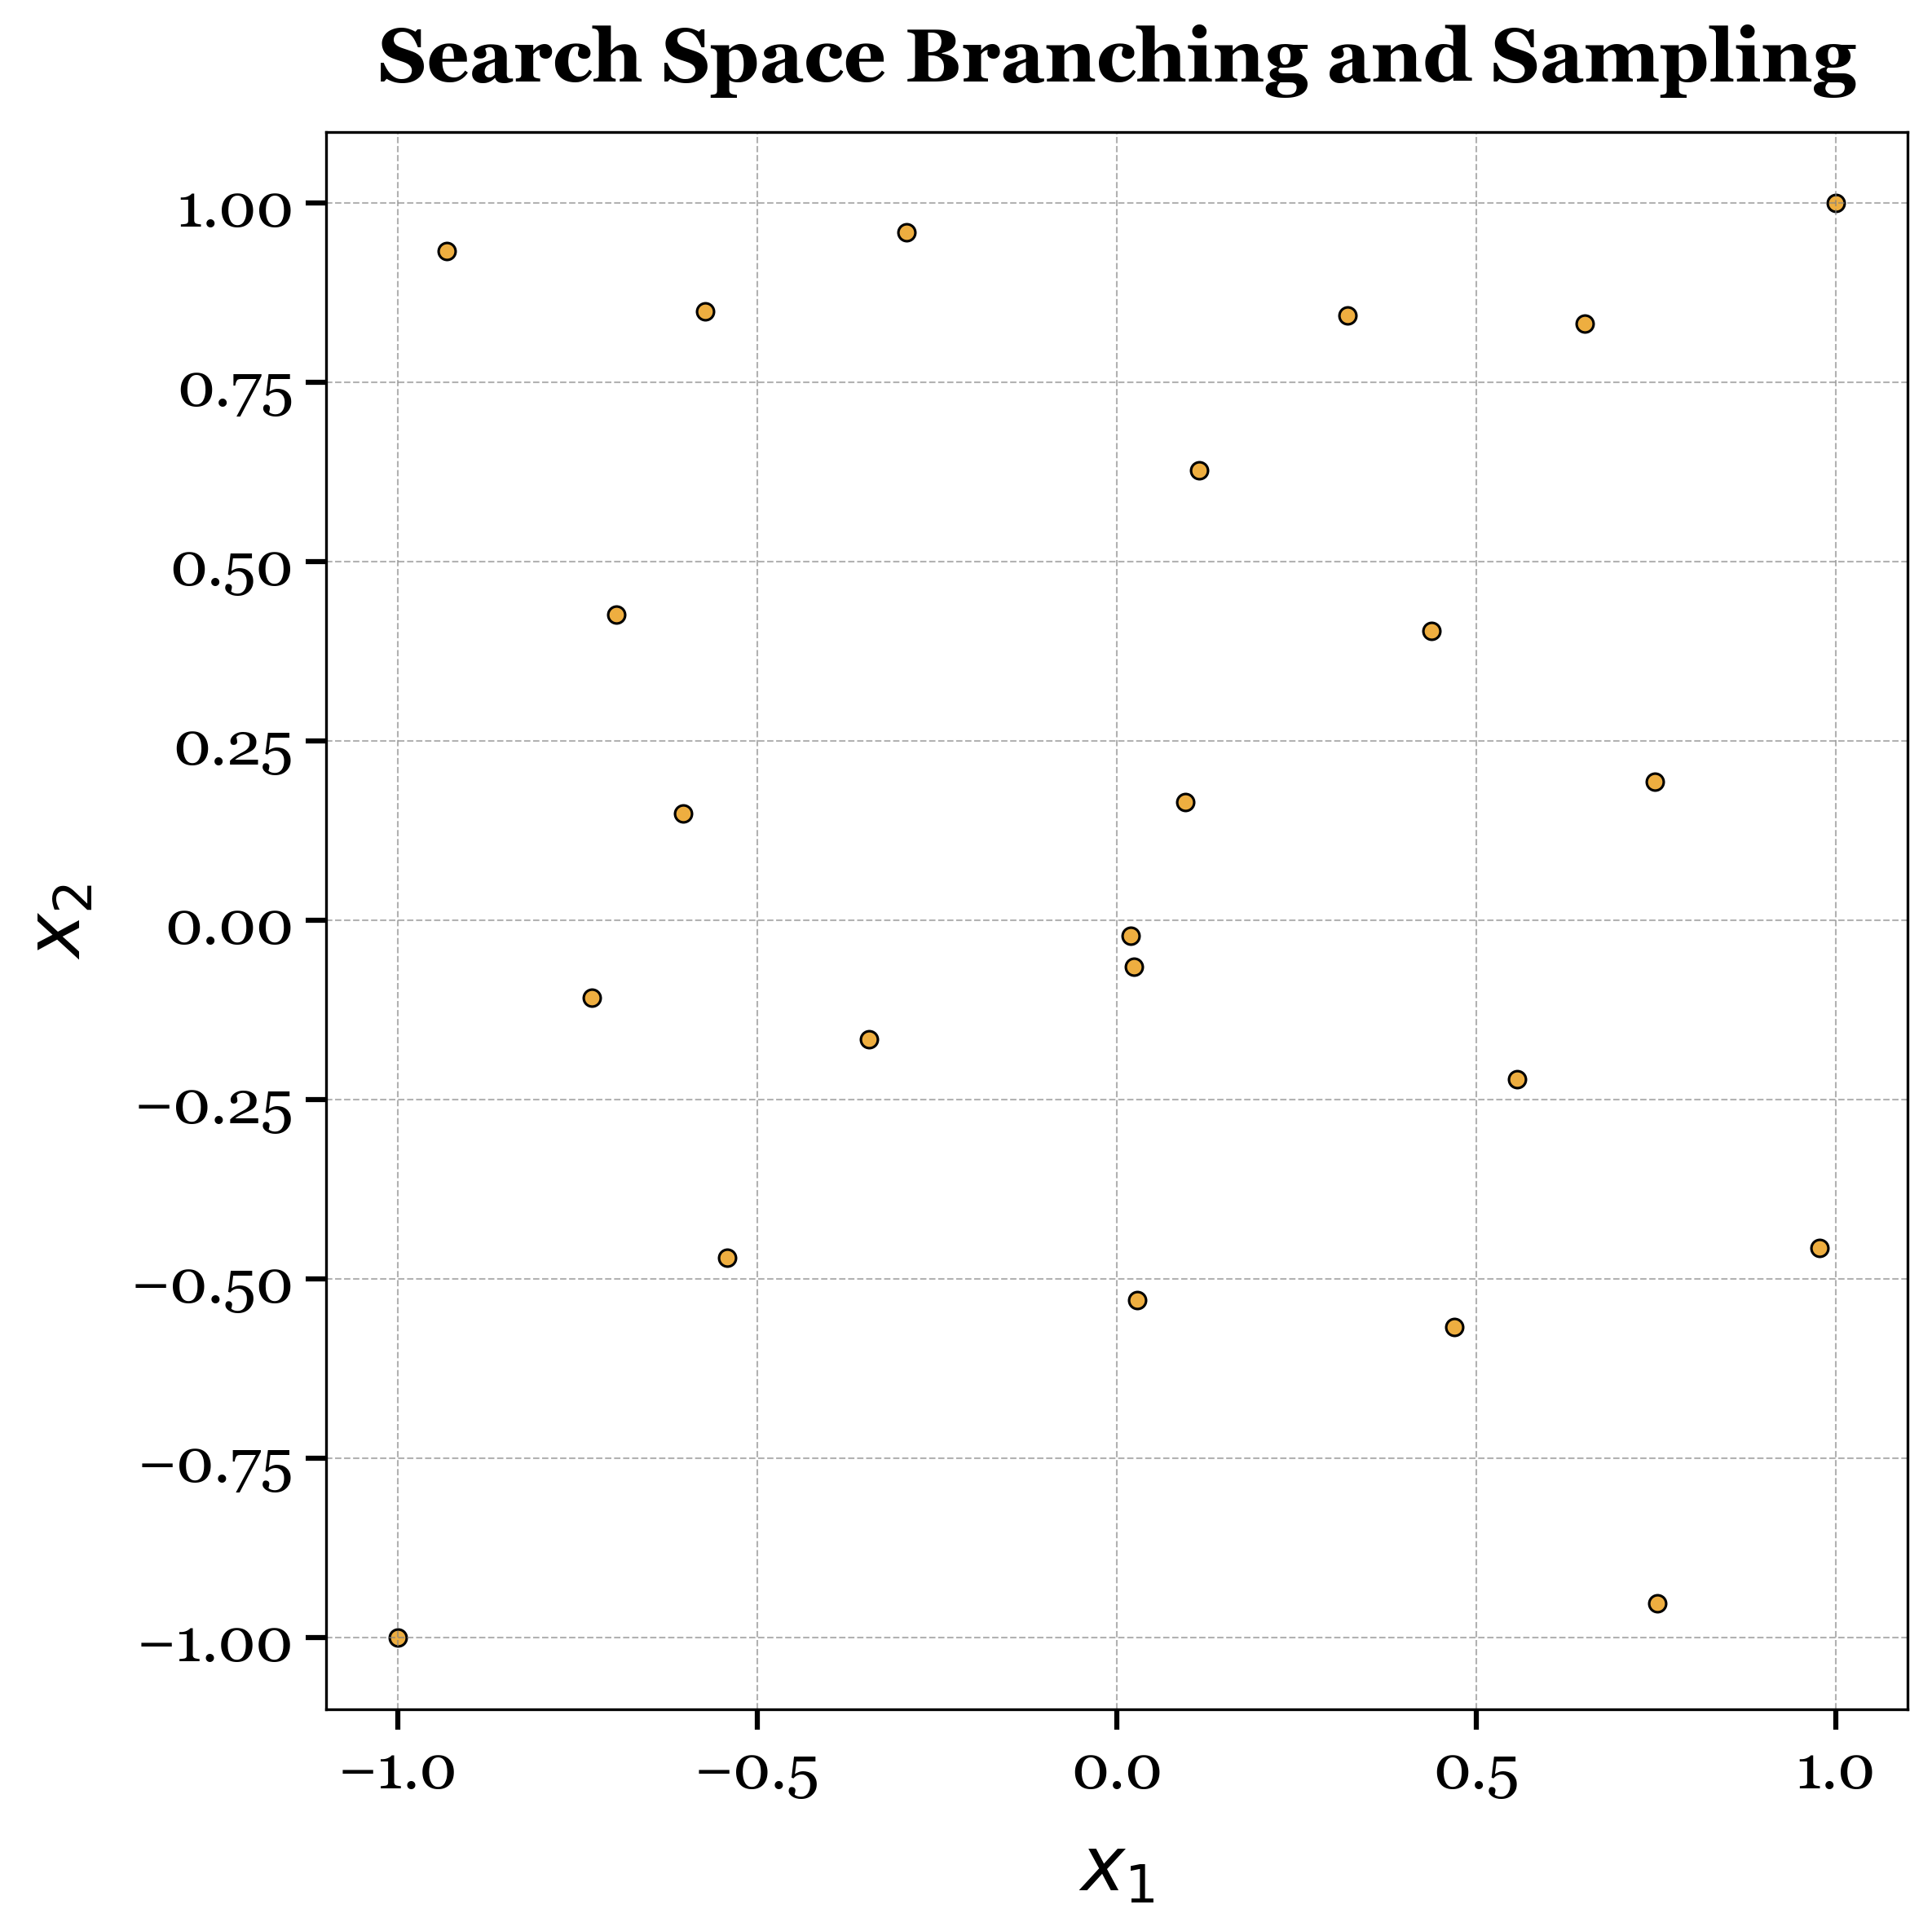

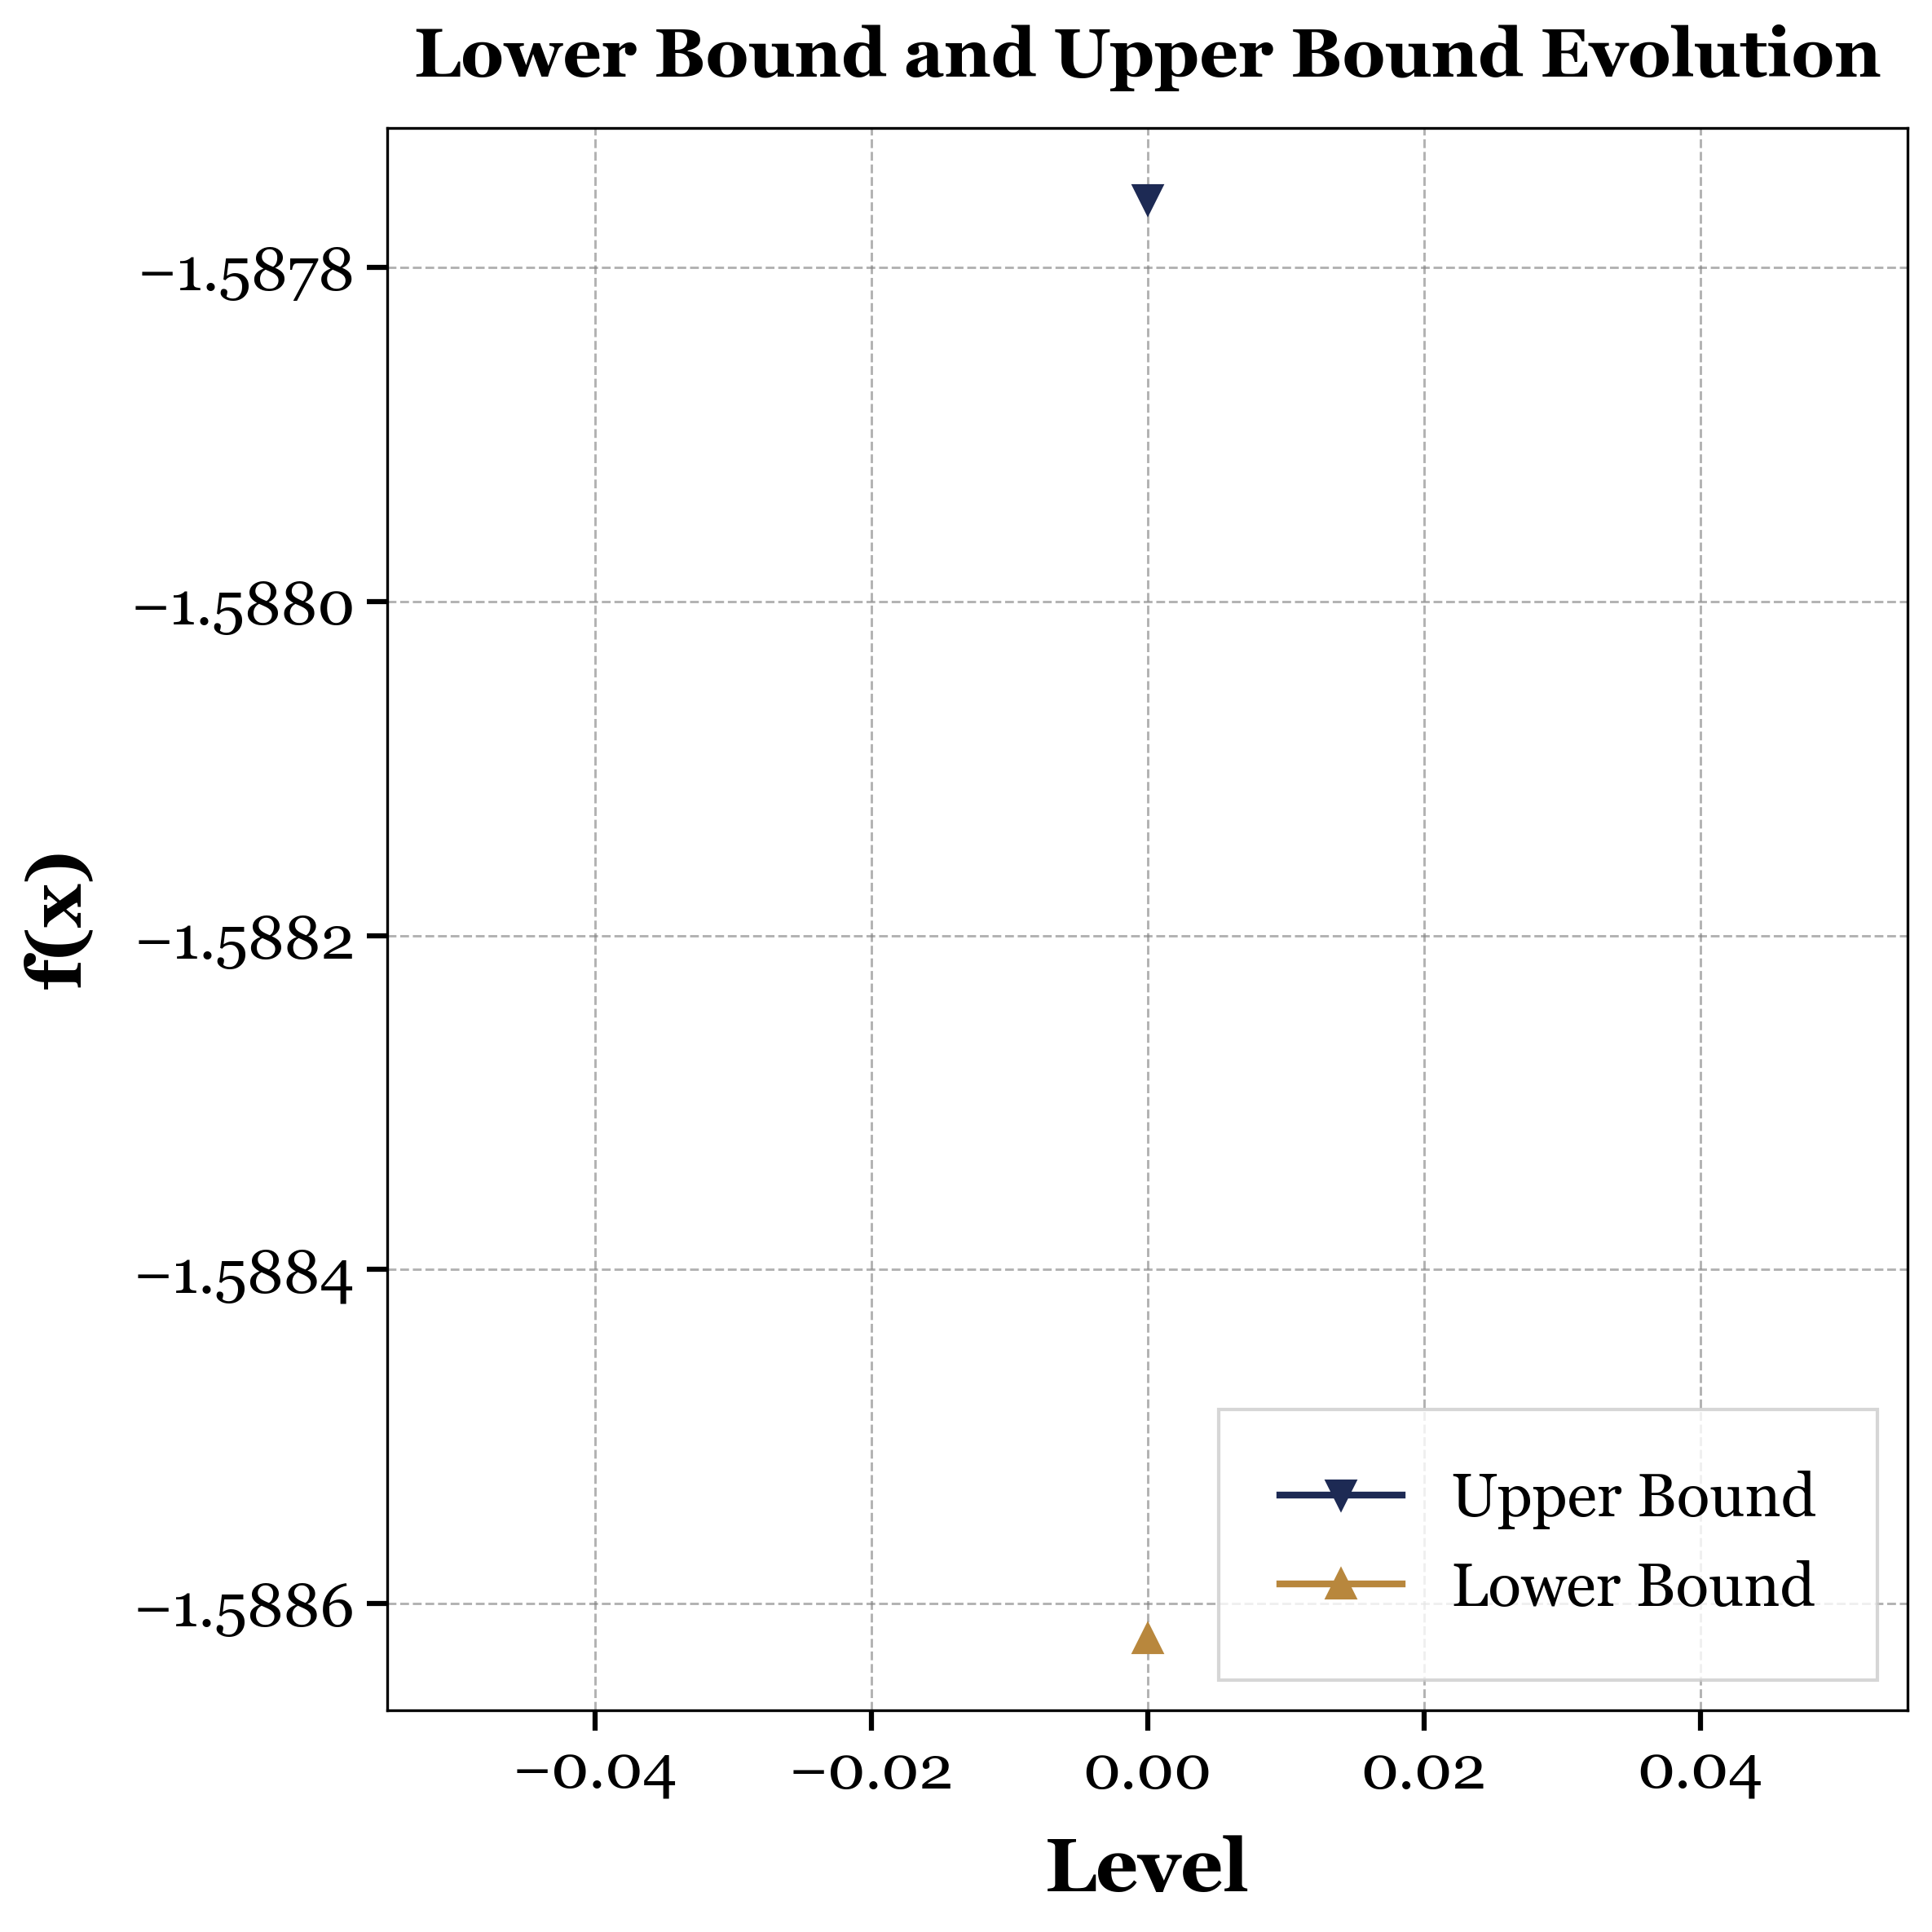

In [12]:
## Lowerbound and upperbound for quadratic underestimator
fig = plt.figure(figsize=(8, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)

marker_clr = '#EEAE40'
for level in bcp_solver.Tree.keys():
    for node in bcp_solver.Tree[level].values():
        shade1 = np.arange(node.bounds[0, 0], node.bounds[1, 0], 0.001)
        ax2.fill_between(
            shade1,
            node.bounds[1, 1],
            node.bounds[0, 1],
            facecolor=plt.cm.Greys(level / len(bcp_solver.Tree.keys())),
            edgecolor='white',
            linewidth=0.4,
            alpha=0.8
        )
        ax2.scatter(
            node.x[:, 0],
            node.x[:, 1],
            marker='.',
            s=100,
            c=marker_clr,
            edgecolors='black',
            linewidth=0.75
        )

ax2.set_xlabel('$x_1$', fontsize=22, fontweight='bold', labelpad=10)
ax2.set_ylabel('$x_2$', fontsize=22, fontweight='bold', labelpad=10)
ax2.tick_params(axis='both', labelsize=18, width=1.5, length=6)
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_title('Search Space Branching and Sampling', fontsize=22, fontweight='bold', pad=15)
plt.tight_layout()

plt.show()

###-------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(1, 1, 1)

levels = range(len(bcp_solver._lowerbound_hist))

ax.plot(
    levels, 
    bcp_solver._upperbound_hist, 
    label='Upper Bound', 
    color= '#1d2a54', 
    marker='v', 
    markersize=8, 
    linewidth=2
)
ax.plot(
    levels, 
    bcp_solver._lowerbound_hist, 
    label='Lower Bound', 
    color='#b8873d', 
    marker='^', 
    markersize=8, 
    linewidth=2
)
ax.set_xlabel('Level', fontsize=22, fontweight='bold', labelpad=10)
ax.set_ylabel('f(x)', fontsize=22, fontweight='bold', labelpad=10)

ax.tick_params(axis='both', labelsize=18, width=1.5, length=6)

ax.legend(
    fontsize=18, 
    frameon=True, 
    loc='lower right', 
    fancybox=False, 
    shadow=False, 
    borderpad=1
)

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_title('Lower Bound and Upper Bound Evolution', fontsize=20, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()



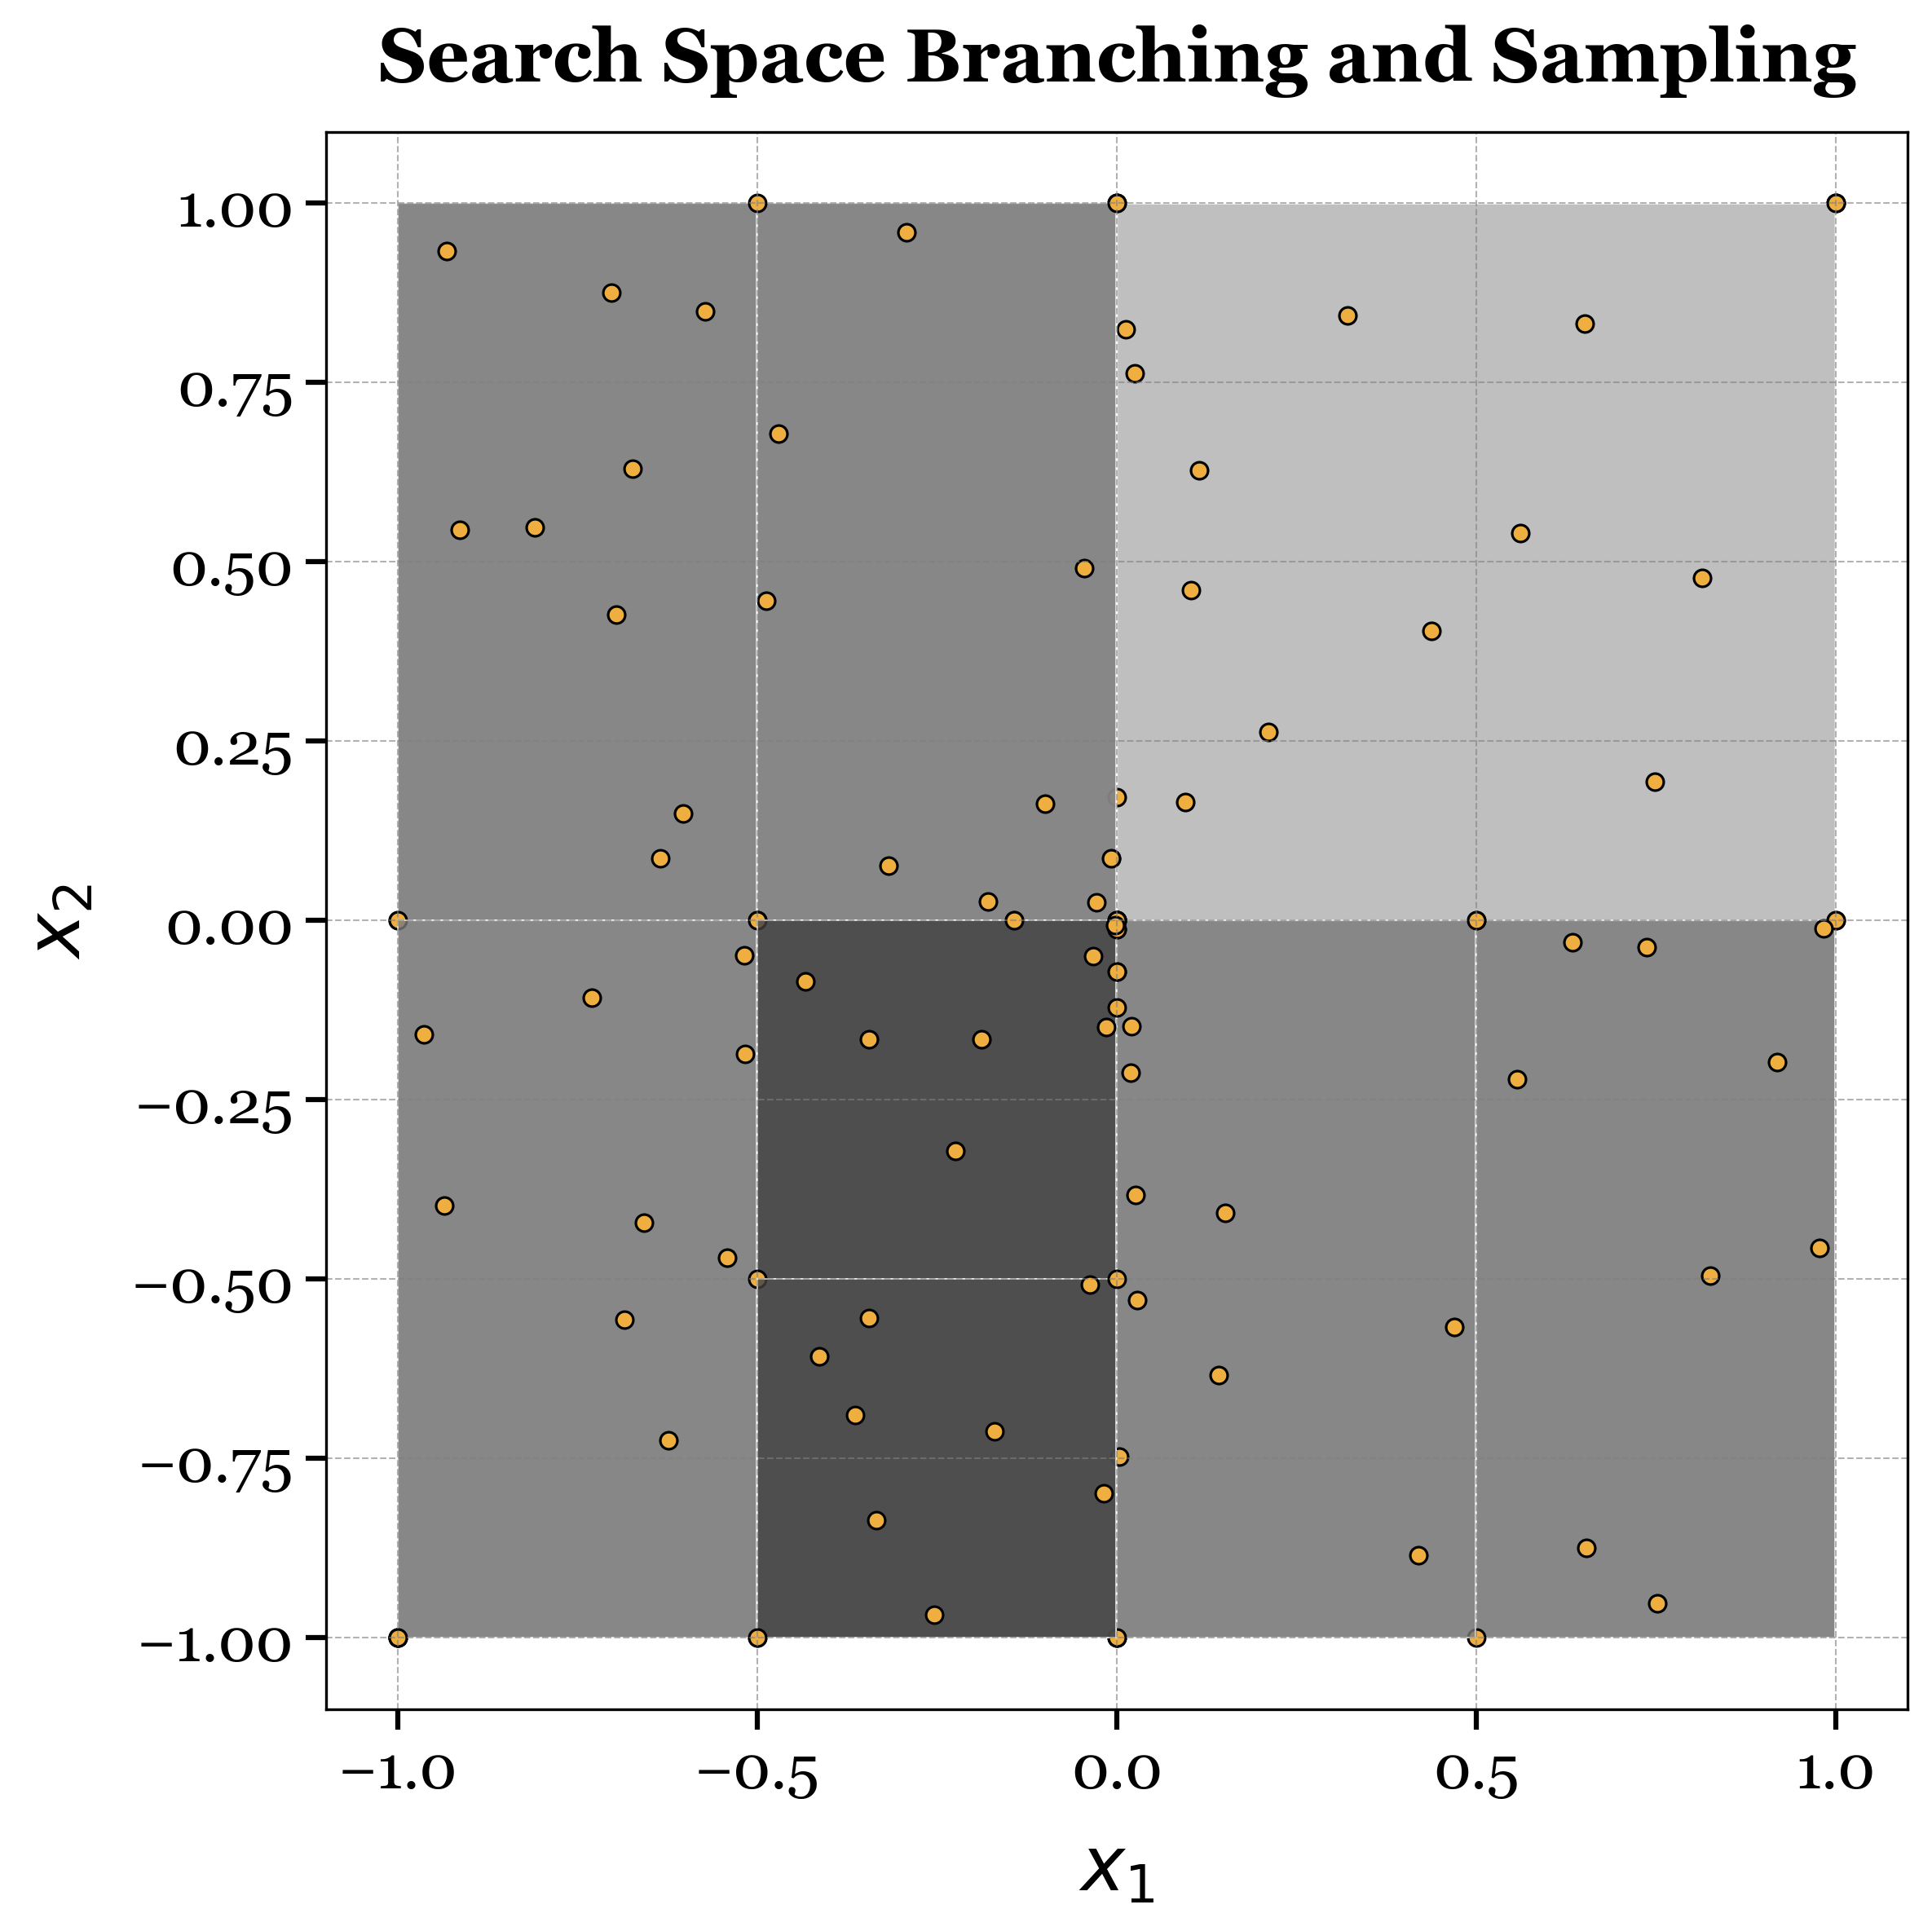

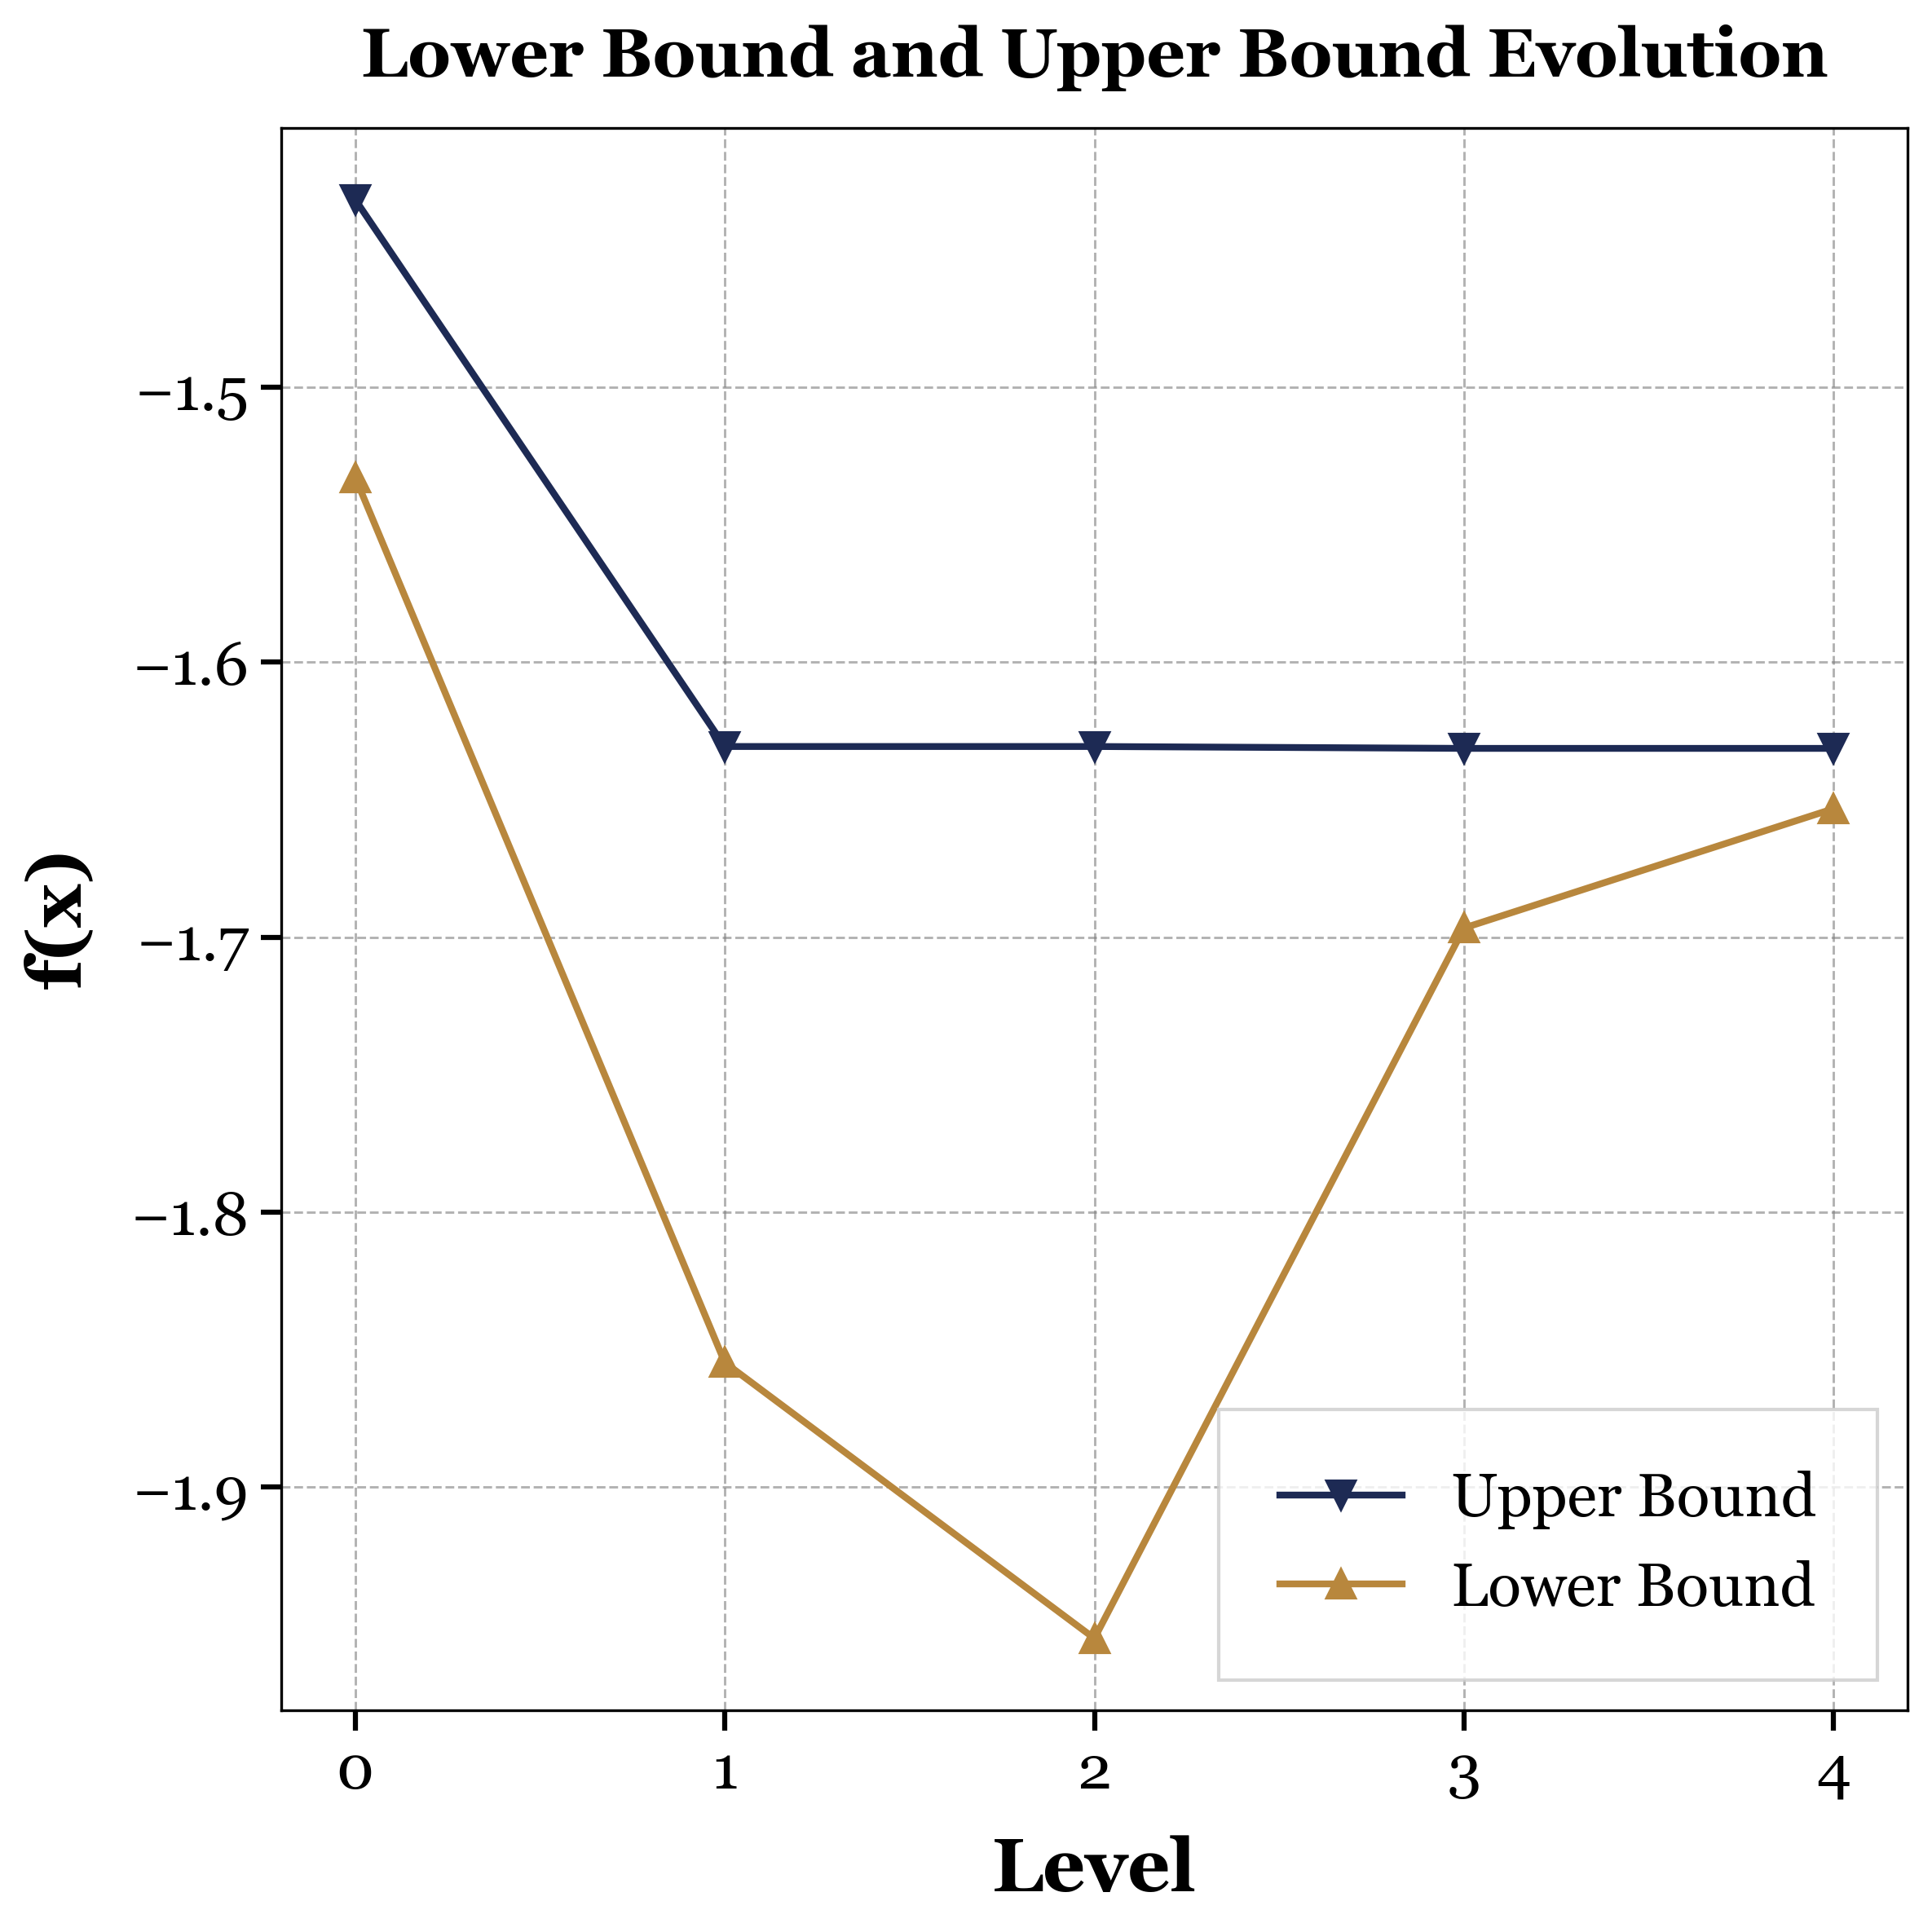

In [13]:
## SVR- Multifidelity

fig = plt.figure(figsize=(8, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)

marker_clr = '#EEAE40'
for level in bcp_solver_SVR.Tree.keys():
    for node in bcp_solver_SVR.Tree[level].values():
        shade1 = np.arange(node.bounds[0, 0], node.bounds[1, 0], 0.001)
        ax2.fill_between(
            shade1,
            node.bounds[1, 1],
            node.bounds[0, 1],
            facecolor=plt.cm.Greys(level / len(bcp_solver_SVR.Tree.keys())),
            edgecolor='white',
            linewidth=0.4,
            alpha=0.8
        )
        ax2.scatter(
            node.x[:, 0],
            node.x[:, 1],
            marker='.',
            s=100,
            c=marker_clr,
            edgecolors='black',
            linewidth=0.75
        )

ax2.set_xlabel('$x_1$', fontsize=22, fontweight='bold', labelpad=10)
ax2.set_ylabel('$x_2$', fontsize=22, fontweight='bold', labelpad=10)
ax2.tick_params(axis='both', labelsize=18, width=1.5, length=6)
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_title('Search Space Branching and Sampling', fontsize=22, fontweight='bold', pad=15)
plt.tight_layout()

plt.show()

###-------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(1, 1, 1)

levels = range(len(bcp_solver_SVR._lowerbound_hist))

ax.plot(
    levels, 
    bcp_solver_SVR._upperbound_hist, 
    label='Upper Bound', 
    color= '#1d2a54', 
    marker='v', 
    markersize=8, 
    linewidth=2
)
ax.plot(
    levels, 
    bcp_solver_SVR._lowerbound_hist, 
    label='Lower Bound', 
    color='#b8873d', 
    marker='^', 
    markersize=8, 
    linewidth=2
)
ax.set_xlabel('Level', fontsize=22, fontweight='bold', labelpad=10)
ax.set_ylabel('f(x)', fontsize=22, fontweight='bold', labelpad=10)

ax.tick_params(axis='both', labelsize=18, width=1.5, length=6)

ax.legend(
    fontsize=18, 
    frameon=True, 
    loc='lower right', 
    fancybox=False, 
    shadow=False, 
    borderpad=1
)

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_title('Lower Bound and Upper Bound Evolution', fontsize=20, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()



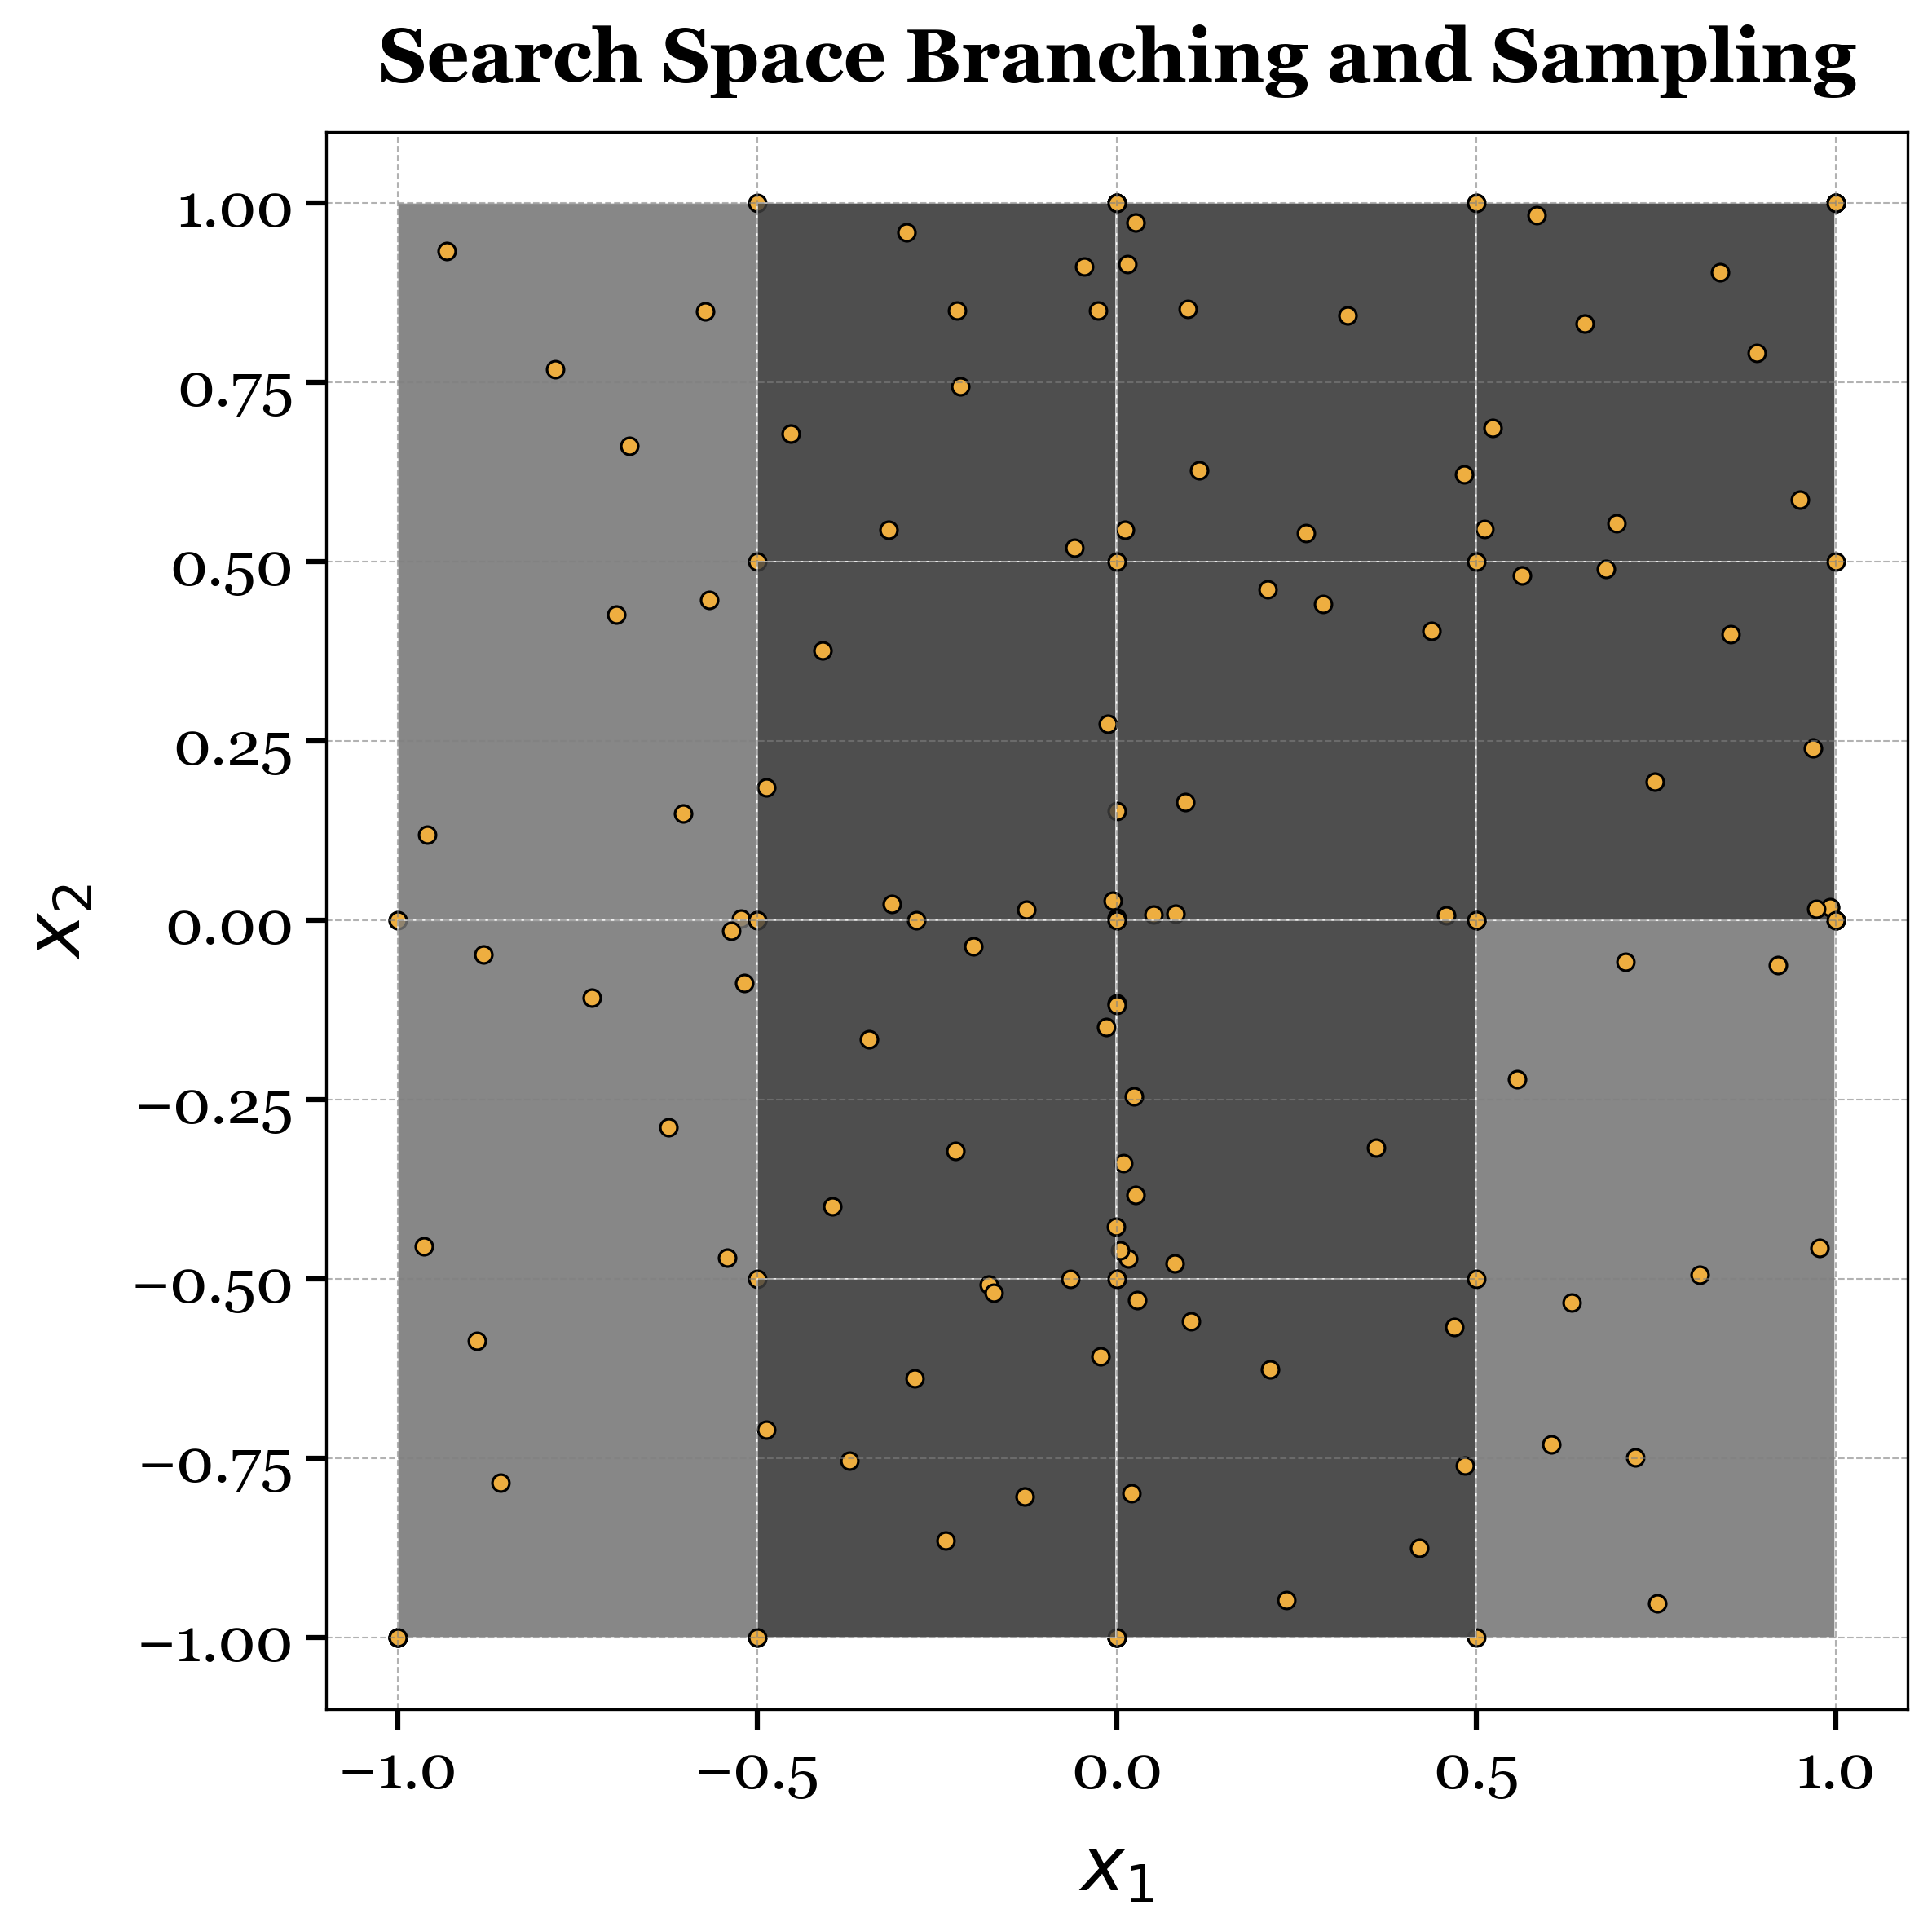

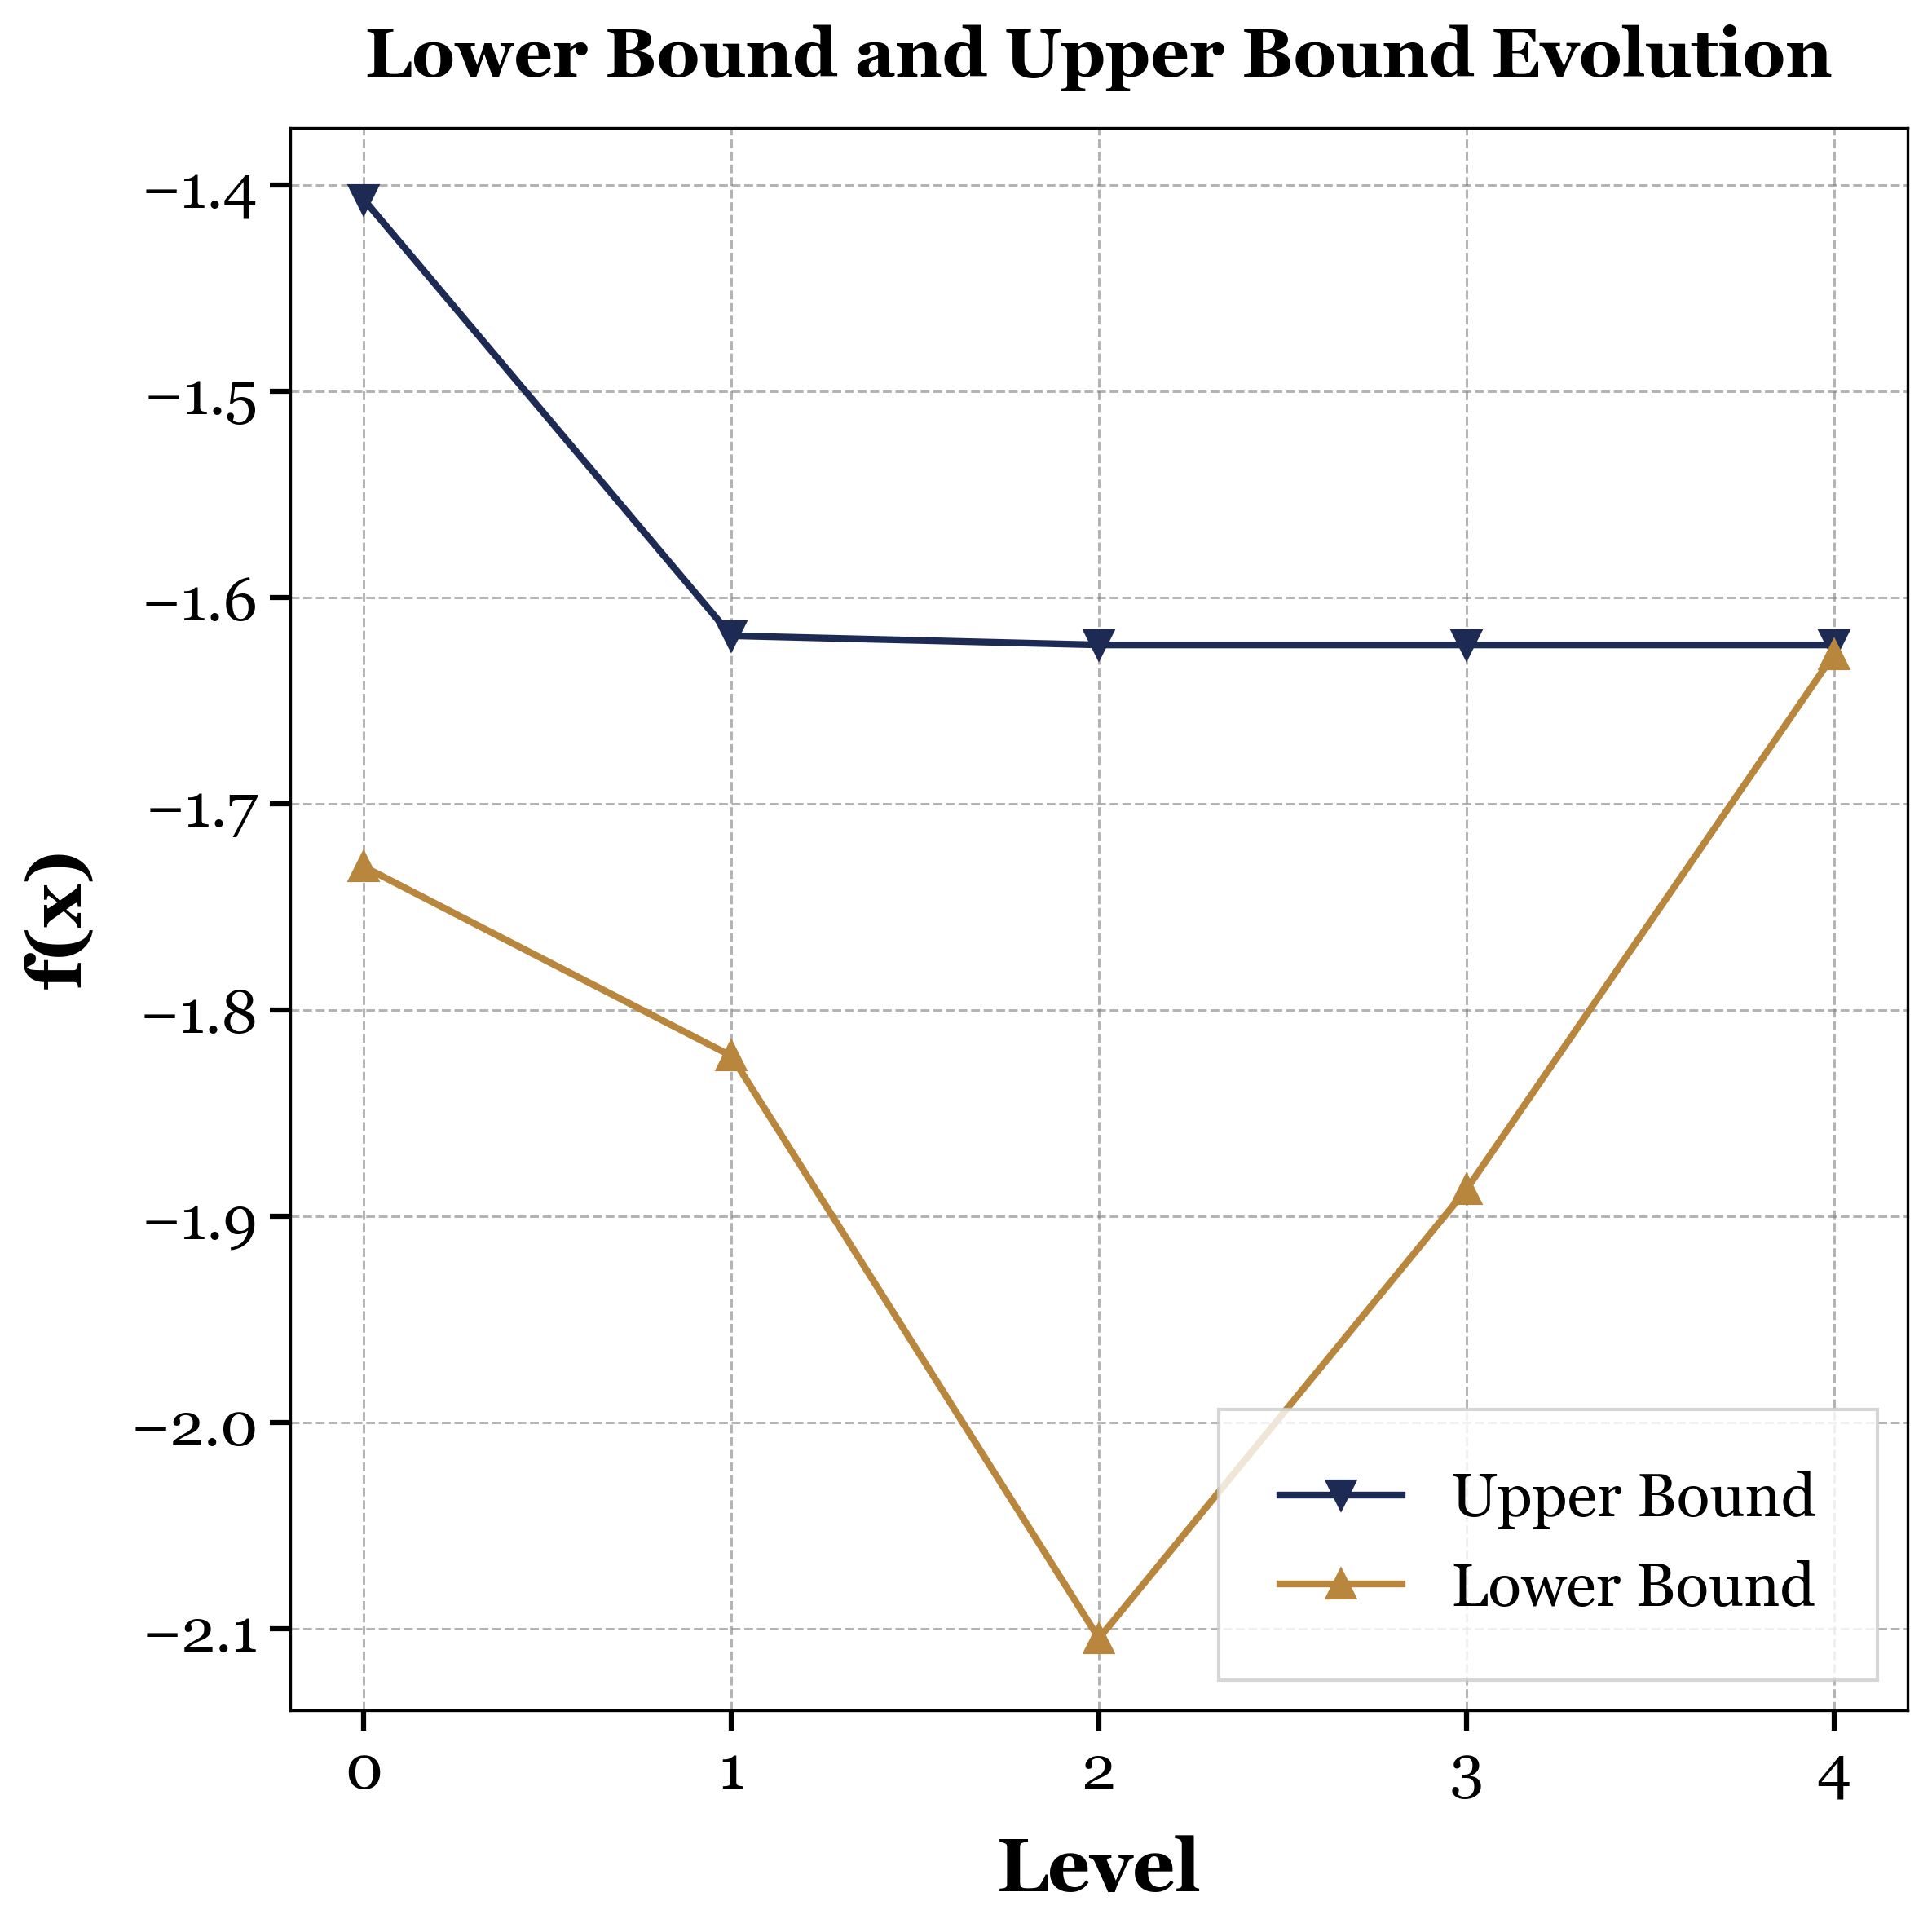

In [14]:
## NN- Multifidelity

fig = plt.figure(figsize=(8, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)

marker_clr = '#EEAE40'
for level in bcp_solver_NN.Tree.keys():
    for node in bcp_solver_NN.Tree[level].values():
        shade1 = np.arange(node.bounds[0, 0], node.bounds[1, 0], 0.001)
        ax2.fill_between(
            shade1,
            node.bounds[1, 1],
            node.bounds[0, 1],
            facecolor=plt.cm.Greys(level / len(bcp_solver_NN.Tree.keys())),
            edgecolor='white',
            linewidth=0.4,
            alpha=0.8
        )
        ax2.scatter(
            node.x[:, 0],
            node.x[:, 1],
            marker='.',
            s=100,
            c=marker_clr,
            edgecolors='black',
            linewidth=0.75
        )

ax2.set_xlabel('$x_1$', fontsize=22, fontweight='bold', labelpad=10)
ax2.set_ylabel('$x_2$', fontsize=22, fontweight='bold', labelpad=10)
ax2.tick_params(axis='both', labelsize=18, width=1.5, length=6)
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_title('Search Space Branching and Sampling', fontsize=22, fontweight='bold', pad=15)
plt.tight_layout()

plt.show()

###-------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(1, 1, 1)

levels = range(len(bcp_solver_NN._lowerbound_hist))

ax.plot(
    levels, 
    bcp_solver_NN._upperbound_hist, 
    label='Upper Bound', 
    color= '#1d2a54', 
    marker='v', 
    markersize=8, 
    linewidth=2
)
ax.plot(
    levels, 
    bcp_solver_NN._lowerbound_hist, 
    label='Lower Bound', 
    color='#b8873d', 
    marker='^', 
    markersize=8, 
    linewidth=2
)
ax.set_xlabel('Level', fontsize=22, fontweight='bold', labelpad=10)
ax.set_ylabel('f(x)', fontsize=22, fontweight='bold', labelpad=10)

ax.tick_params(axis='both', labelsize=18, width=1.5, length=6)

ax.legend(
    fontsize=18, 
    frameon=True, 
    loc='lower right', 
    fancybox=False, 
    shadow=False, 
    borderpad=1
)

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_title('Lower Bound and Upper Bound Evolution', fontsize=20, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()



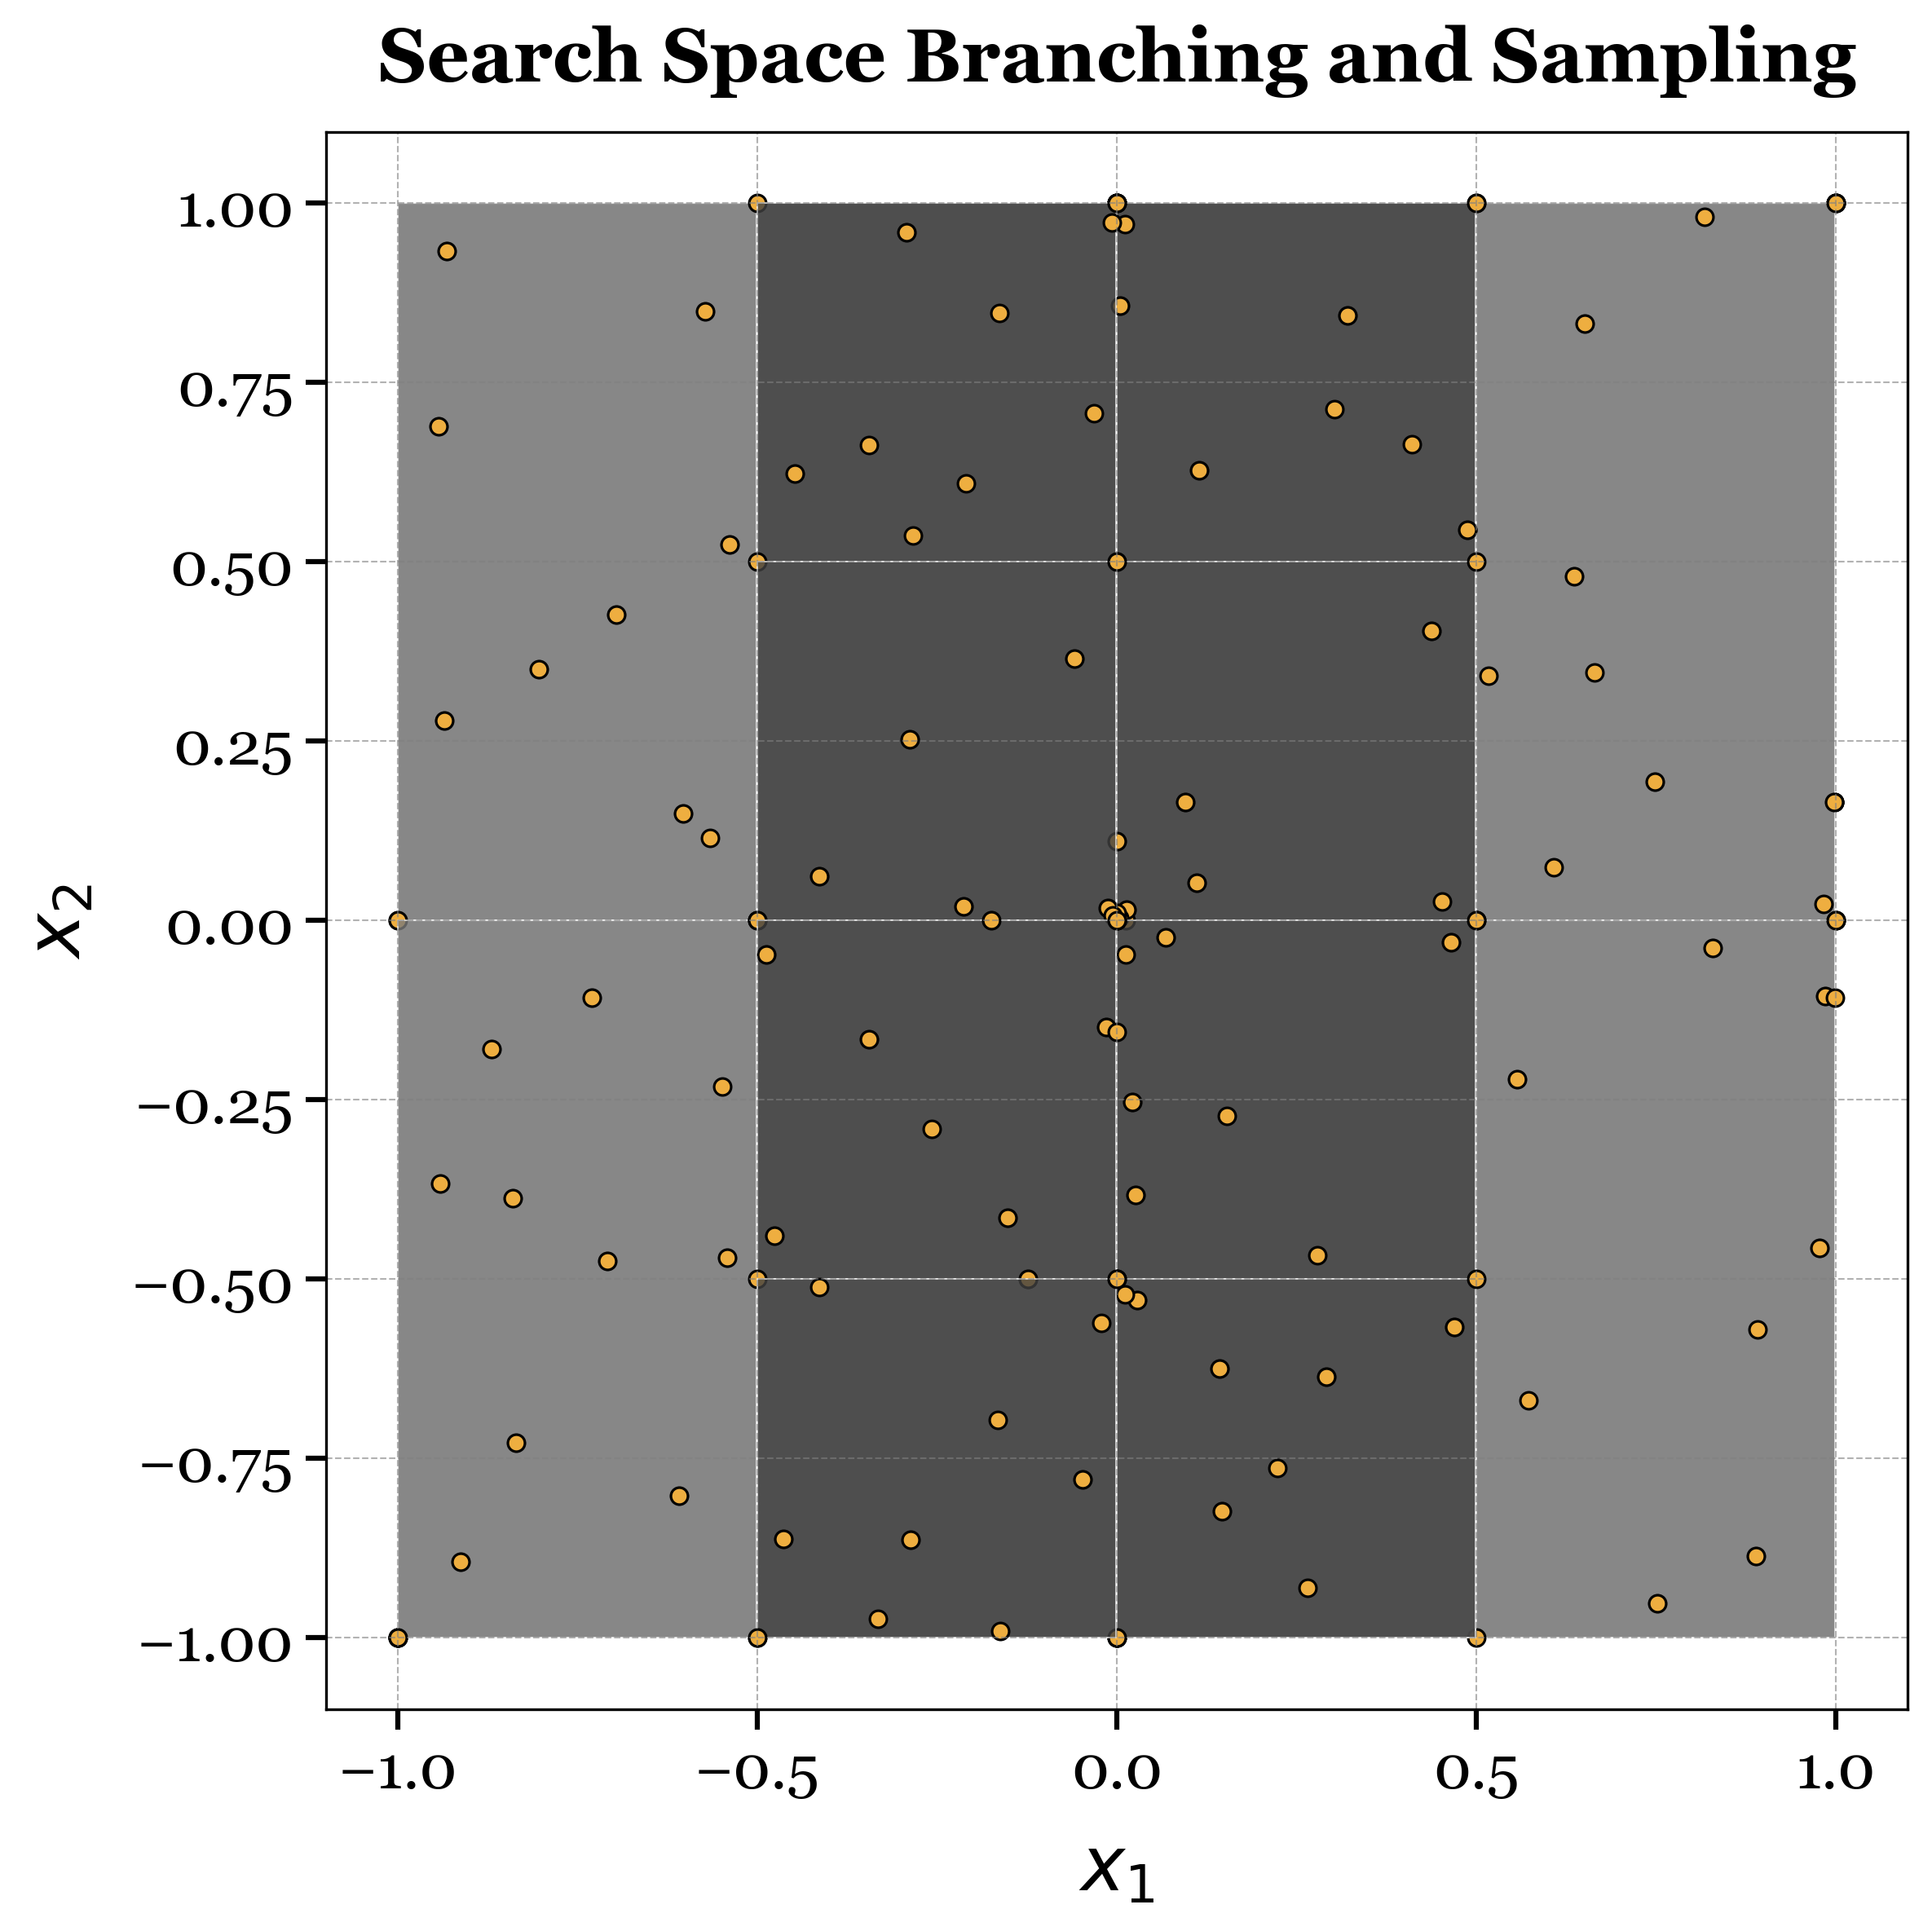

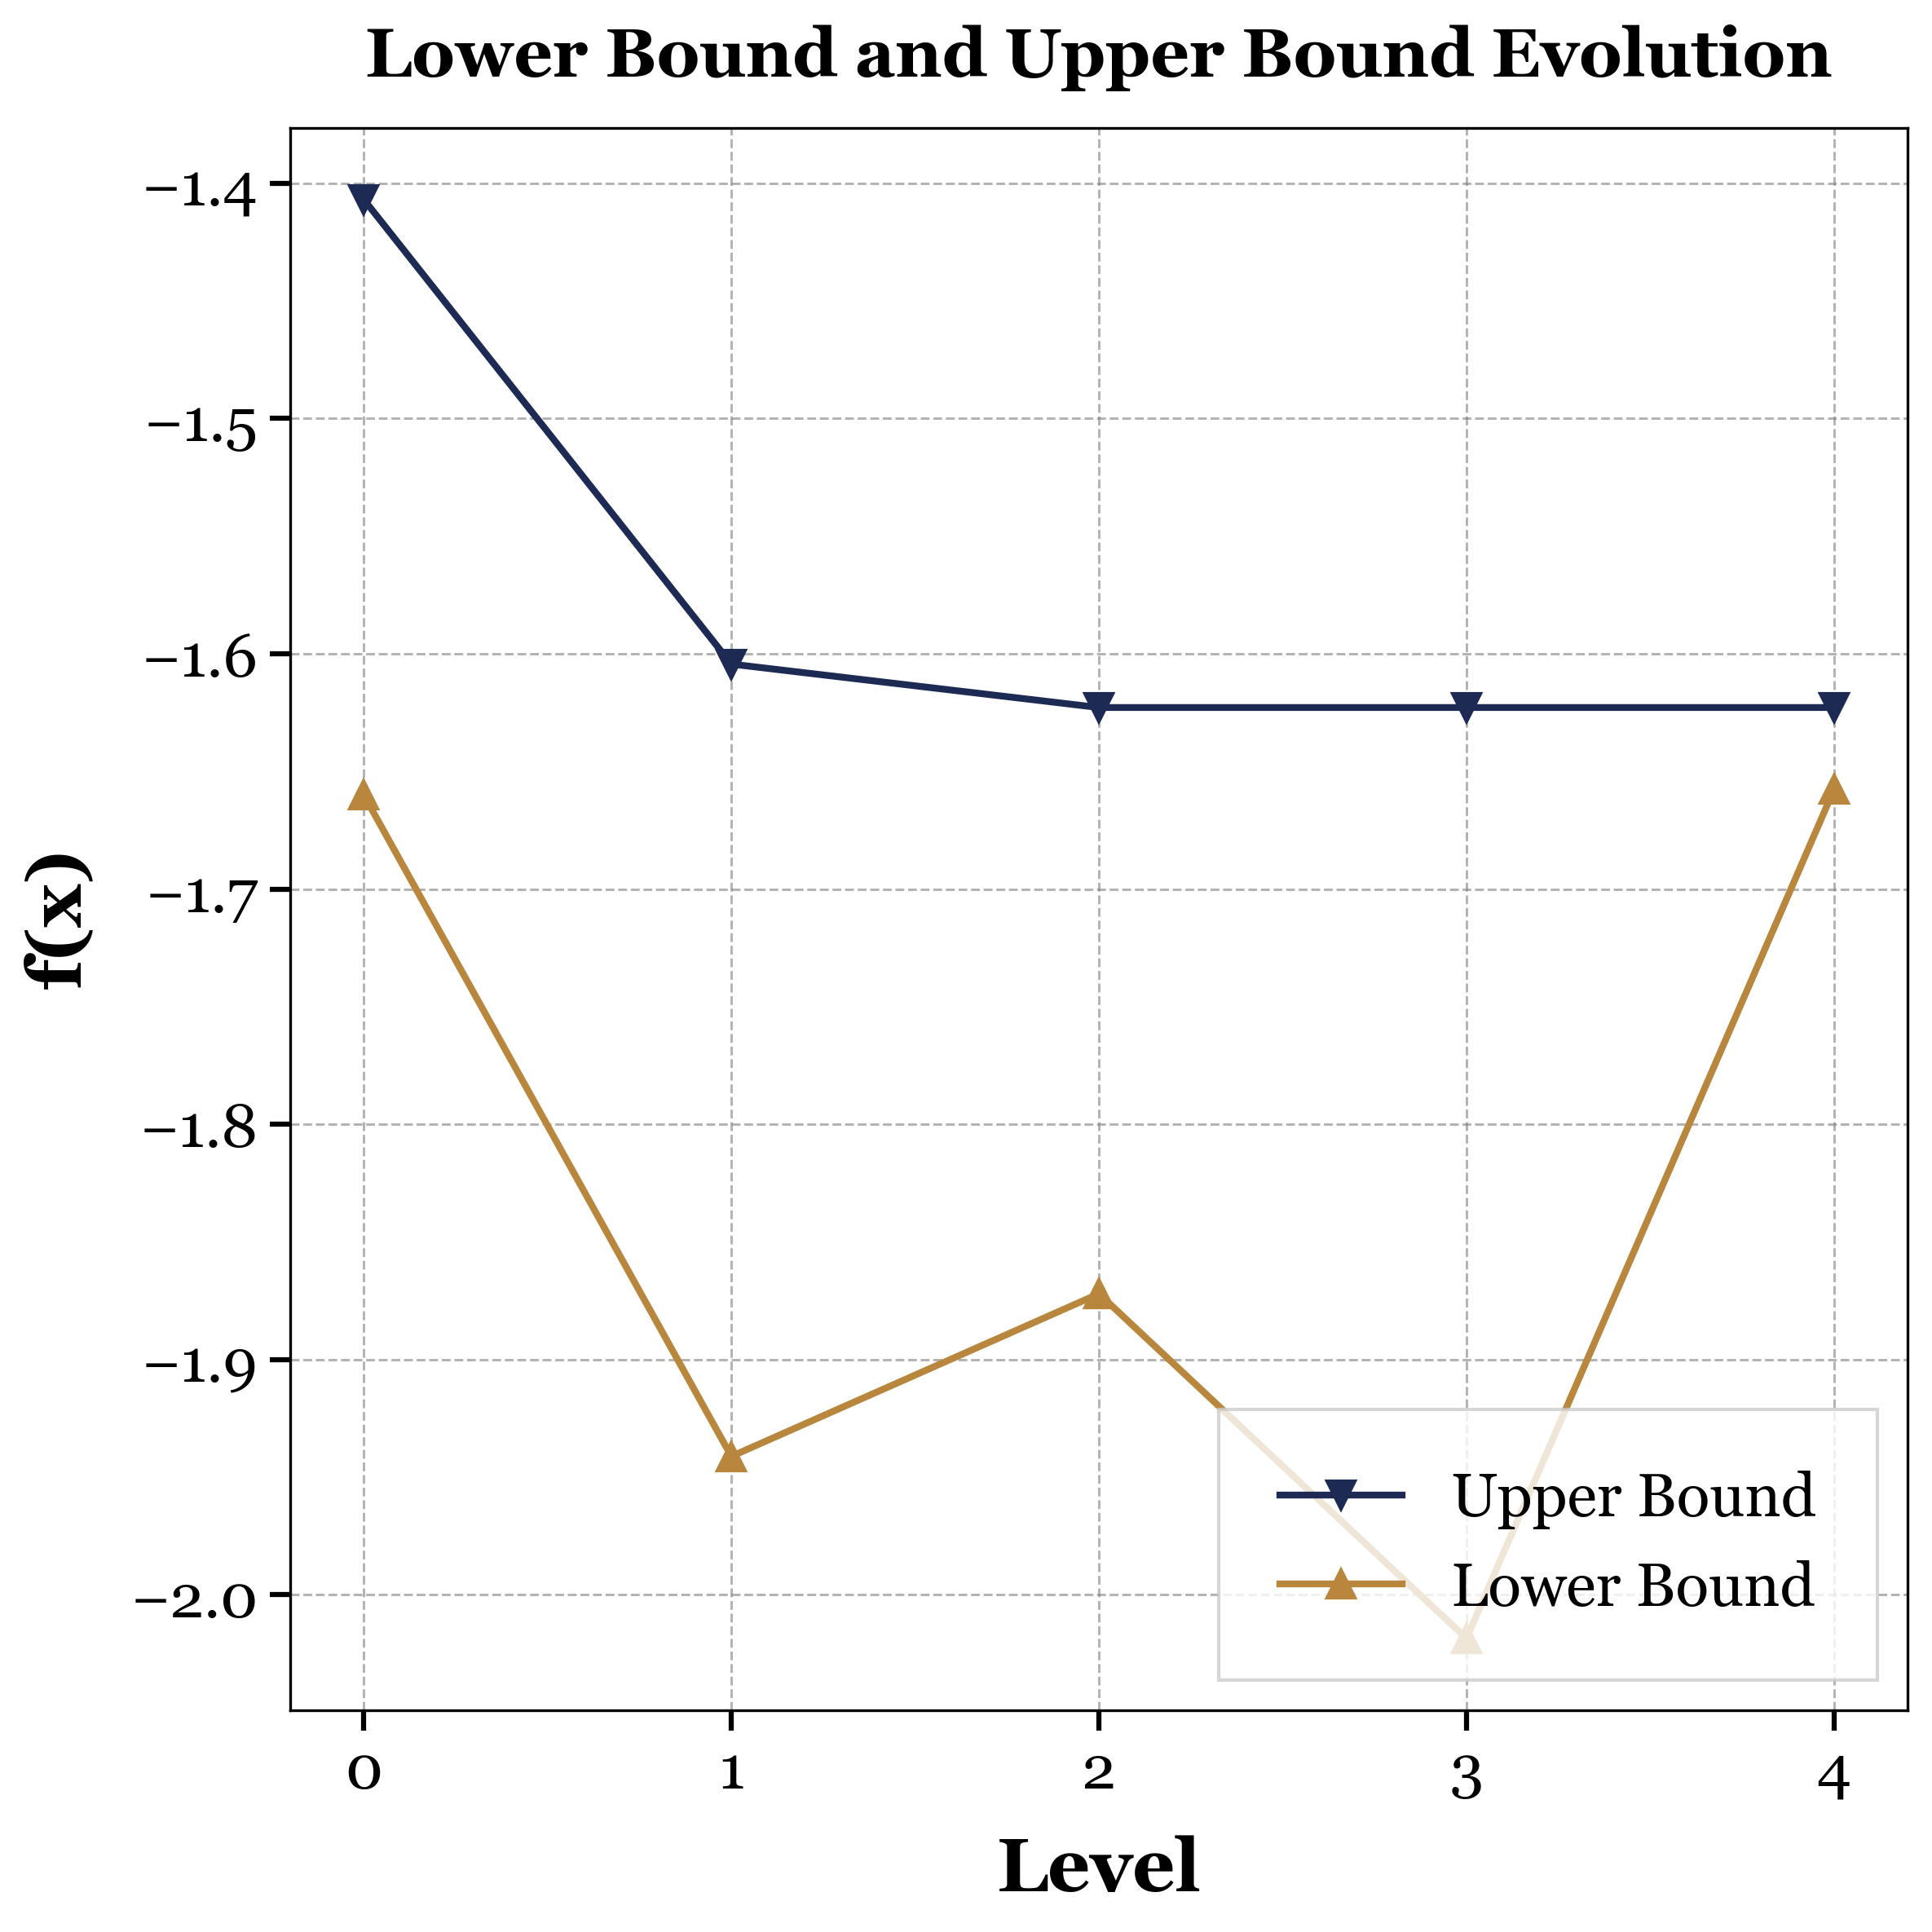

In [15]:
## MFSM - multifidelity
fig = plt.figure(figsize=(8, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)

marker_clr = '#EEAE40'
for level in bcp_solver_MFSM.Tree.keys():
    for node in bcp_solver_MFSM.Tree[level].values():
        shade1 = np.arange(node.bounds[0, 0], node.bounds[1, 0], 0.001)
        ax2.fill_between(
            shade1,
            node.bounds[1, 1],
            node.bounds[0, 1],
            facecolor=plt.cm.Greys(level / len(bcp_solver_MFSM.Tree.keys())),
            edgecolor='white',
            linewidth=0.4,
            alpha=0.8
        )
        ax2.scatter(
            node.x[:, 0],
            node.x[:, 1],
            marker='.',
            s=100,
            c=marker_clr,
            edgecolors='black',
            linewidth=0.75
        )

ax2.set_xlabel('$x_1$', fontsize=22, fontweight='bold', labelpad=10)
ax2.set_ylabel('$x_2$', fontsize=22, fontweight='bold', labelpad=10)
ax2.tick_params(axis='both', labelsize=18, width=1.5, length=6)
ax2.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
ax2.set_title('Search Space Branching and Sampling', fontsize=22, fontweight='bold', pad=15)
plt.tight_layout()

plt.show()

###-------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(1, 1, 1)

levels = range(len(bcp_solver_MFSM._lowerbound_hist))

ax.plot(
    levels, 
    bcp_solver_MFSM._upperbound_hist, 
    label='Upper Bound', 
    color= '#1d2a54', 
    marker='v', 
    markersize=8, 
    linewidth=2
)
ax.plot(
    levels, 
    bcp_solver_MFSM._lowerbound_hist, 
    label='Lower Bound', 
    color='#b8873d', 
    marker='^', 
    markersize=8, 
    linewidth=2
)
ax.set_xlabel('Level', fontsize=22, fontweight='bold', labelpad=10)
ax.set_ylabel('f(x)', fontsize=22, fontweight='bold', labelpad=10)

ax.tick_params(axis='both', labelsize=18, width=1.5, length=6)

ax.legend(
    fontsize=18, 
    frameon=True, 
    loc='lower right', 
    fancybox=False, 
    shadow=False, 
    borderpad=1
)

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.set_title('Lower Bound and Upper Bound Evolution', fontsize=20, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

